In [1]:
# https://www.nirfindia.org/nirfpdfcdn/2022/flipbook/index.html#p=34 offered an insight:
#   NIRF Rank is strongly correlated with "research performance".
# RP process issues can be distinguished broadly at https://www.oecd.org/sti/inno/Innovation-process-issues-OECDImpact.pdf.
# https://www.oecd.org/innovation/inno/41965313.pdf offers a pre-2010 historical perspective.
#
# This author compiled data from https://www.nirfindia.org/2022/EngineeringRanking.html, including its linked ones.
# Similarly, it was compiled for 2021 and 2020. To ease the manual compilation,
# about 10% of 200 ranked instituions was considered.
# Institutions ranked in top 20 in any of those 3 years were included, except for "IR-E-U-0184"
# whose Rank 41 in 2021 would have called for including 20 more which were ranked better ...
# https://www.nirfindia.org/nirfpdfcdn/2022/framework/Engineering.pdf has a
# Summary of Ranking Parameters and Weightages.
#
# "IR-E-U-0701" could be an example institution of interest.
fileIn <- file.path("C://Users/SONY/Desktop/alumniMentorship", "inNIRFe3.csv"); fileIn
  # Was till 2022Aug26: "inNIRFd.csv"
date()

[1] "C://Users/SONY/Desktop/alumniMentorship/inNIRFe3.csv"

[1] "Sat Sep  3 18:10:36 2022"

In [2]:
datNIRF.bak <- read.csv(file=fileIn)
datNIRF.bak$institution <- as.factor(datNIRF.bak$institution)
datNIRF.bak$year <- as.factor(datNIRF.bak$year)
datNIRF.bak$year <- relevel(datNIRF.bak$year, ref="2021") # considering (a) a dip in SRCrevenue in year2021
  # and (b) a possible dropping of year2020 data coz it does not have "faculty" (and "SRCrevPerFaculty") data.
datNIRF.bak$category <- as.factor(datNIRF.bak$category)
UGPGPhD <- datNIRF.bak$UGactualStudents + datNIRF.bak$PGactualStudents + datNIRF.bak$PhDpursuing
propPGPhD <- (datNIRF.bak$PGactualStudents + datNIRF.bak$PhDpursuing) / UGPGPhD
propPhD <- datNIRF.bak$PhDpursuing / UGPGPhD
FROcost <- datNIRF.bak$FROsalaries + datNIRF.bak$FROmtce + datNIRF.bak$FROseminars
SRCrevenue <- datNIRF.bak$SRamount + datNIRF.bak$Camount
SRCrevPerFaculty <- SRCrevenue / datNIRF.bak$faculty # surrogate per faculty measure.
  # [RF is average annual research funding earnings (amount actually received in rupees) per
  # faculty at institute level in previous three years]
  # says https://www.nirfindia.org/nirfpdfcdn/2022/framework/Engineering.pdf
datNIRF.bak <- cbind(datNIRF.bak, UGPGPhD=UGPGPhD, propPGPhD=propPGPhD, propPhD=propPhD,
                     FROcost=FROcost, SRCrevenue=SRCrevenue, SRCrevPerFaculty=SRCrevPerFaculty,
                     pScore=datNIRF.bak$Score / 100) # coz [0,1] success "probability" is expected for
                       # Binomial Logistic Regression and other modeling.
str(datNIRF.bak)

'data.frame':	66 obs. of  42 variables:
 $ institution               : Factor w/ 22 levels "IR-E-I-1074",..: 16 16 16 1 1 1 10 10 10 2 ...
 $ year                      : Factor w/ 3 levels "2021","2020",..: 3 1 2 3 1 2 3 1 2 3 ...
 $ UGactualStudents          : int  4377 3935 4120 4405 3988 3793 4554 4179 4015 3642 ...
 $ PGactualStudents          : int  1895 1914 1783 2619 2177 1955 2063 1738 1936 1856 ...
 $ PhDpursuing               : int  2204 2151 2142 3332 2919 2615 2411 2187 2200 1965 ...
 $ FROsalaries               : num  551 560 476 340 343 ...
 $ FROmtce                   : num  459 399 328 364 320 ...
 $ FROseminars               : num  11.05 17.19 27.46 0.53 1.3 ...
 $ SRprojects                : int  777 605 575 581 624 567 521 622 563 879 ...
 $ SRagencies                : int  91 97 64 205 195 140 170 185 149 150 ...
 $ SRamount                  : num  401 390 521 261 228 ...
 $ Cprojects                 : int  866 943 867 355 362 387 532 720 733 375 ...
 $ Corgs       

In [3]:
# Join with publications data fetched using package `openalexR`.
require(dplyr)
fTmp1 <- paste0("educationfacility-upto2022Aug", ".rds")
datOA <- readRDS(file=fTmp1)
datOA$type <- as.factor(datOA$type)
glimpse(datOA)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Rows: 1,519
Columns: 26
$ id                 <chr> "https://openalex.org/I59270414", "https://openalex~
$ name               <chr> "Indian Institute of Science Bangalore", "All India~
$ name_alternatives  <list> NA, "AIIMS Delhi", "IIT Kharagpur", "IIT Bombay", ~
$ name_acronyms      <list> "IISc", NA, "IIT KGP", "IITB", "IITD", NA, "BHU", ~
$ name_international <list> [<data.frame[1 x 50]>], [<data.frame[1 x 28]>], [<~
$ ror                <chr> "https://ror.org/04dese585", "https://ror.org/02dwc~
$ ids                <list> [<tbl_df[6 x 2]>], [<tbl_df[6 x 2]>], [<tbl_df[6 x~
$ country            <chr> "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN", "IN~
$ geo                <list> [<data.frame[1 x 7]>], [<data.frame[1 x 7]>], [<da~
$ type               <fct> education, education, education, education, educati~
$ homepage           <chr> "http://www.iisc.ernet.in/", "http://www.aiims.edu/~
$ image              <chr> "https://upload.wikimedia.org/wikipedia/en/3/3b/Ind~
$ thumbnail     

In [4]:
doJoin <- function(df1, df2, aKey){
    leftJoin <- merge(df1, df2, by=aKey)
    return(leftJoin)
}

In [5]:
cDecimalDigits <- 3
datNIRFOA <- doJoin(datNIRF.bak, datOA, aKey="ror") # datNIRF.bak
  # Was till 2022Aug23: datNIRF.bak[datNIRF.bak$year == 2022,] # consider only latest (year 2022) data for now.
datNIRFOA <- cbind(datNIRFOA,
                   works2022perFaculty=round(datNIRFOA$works_count2022 / datNIRFOA$faculty, cDecimalDigits))
glimpse(datNIRFOA)

Rows: 66
Columns: 68
$ ror                        <chr> "https://ror.org/0022nd079", "https://ror.o~
$ institution                <fct> IR-E-U-0053, IR-E-U-0053, IR-E-U-0053, IR-E~
$ year                       <fct> 2022, 2021, 2020, 2022, 2021, 2020, 2022, 2~
$ UGactualStudents           <int> 3165, 2926, 2737, 3757, 3455, 3444, 26185, ~
$ PGactualStudents           <int> 1522, 1331, 1156, 2063, 1852, 1926, 6847, 6~
$ PhDpursuing                <int> 1802, 2002, 2039, 2344, 2114, 2110, 2336, 2~
$ FROsalaries                <dbl> 172.57, 145.25, 119.09, 259.18, 286.54, 210~
$ FROmtce                    <dbl> 145.79, 167.59, 141.35, 86.22, 72.48, 59.81~
$ FROseminars                <dbl> 1.17, 1.34, 1.41, 0.83, 5.89, 5.27, 0.58, 1~
$ SRprojects                 <int> 292, 288, 381, 145, 163, 159, 105, 105, 171~
$ SRagencies                 <int> 55, 41, 16, 35, 37, 106, 16, 19, 34, 61, 87~
$ SRamount                   <dbl> 195.49, 79.35, 80.87, 69.96, 83.56, 55.51, ~
$ Cprojects        

In [6]:
colnames.vec <- setdiff(colnames(datNIRFOA),
        c(c('OverallScore', 'InternationalStudentsRatio','InternationalFacultyRatio','FacultyStudentRatio',
          'CitationsPerFaculty','AcademicReputation','EmployerReputation','Count.of.Scholar',
          'Average.of.D.Index','Sum.of.Citations','Sum.of.Publications'),
         c('name_alternatives','name_acronyms','name_international','ids','country','geo'),
         c('associated_inst','TCperYear','concept'))
       )
datNIRF <- datNIRFOA[, colnames.vec]
glimpse(datNIRF)

Rows: 66
Columns: 48
$ ror                 <chr> "https://ror.org/0022nd079", "https://ror.org/0022~
$ institution         <fct> IR-E-U-0053, IR-E-U-0053, IR-E-U-0053, IR-E-U-0560~
$ year                <fct> 2022, 2021, 2020, 2022, 2021, 2020, 2022, 2021, 20~
$ UGactualStudents    <int> 3165, 2926, 2737, 3757, 3455, 3444, 26185, 25554, ~
$ PGactualStudents    <int> 1522, 1331, 1156, 2063, 1852, 1926, 6847, 6316, 63~
$ PhDpursuing         <int> 1802, 2002, 2039, 2344, 2114, 2110, 2336, 2063, 25~
$ FROsalaries         <dbl> 172.57, 145.25, 119.09, 259.18, 286.54, 210.96, 35~
$ FROmtce             <dbl> 145.79, 167.59, 141.35, 86.22, 72.48, 59.81, 85.17~
$ FROseminars         <dbl> 1.17, 1.34, 1.41, 0.83, 5.89, 5.27, 0.58, 1.93, 2.~
$ SRprojects          <int> 292, 288, 381, 145, 163, 159, 105, 105, 171, 114, ~
$ SRagencies          <int> 55, 41, 16, 35, 37, 106, 16, 19, 34, 61, 87, 89, 2~
$ SRamount            <dbl> 195.49, 79.35, 80.87, 69.96, 83.56, 55.51, 11.70, ~
$ Cprojects        

In [7]:
areAllEq <- all.equal(datNIRF$FROcost, datNIRF$FROsalaries + datNIRF$FROmtce + datNIRF$FROseminars) # test if nearly equal.
stopifnot(areAllEq)
areAllEq <- all.equal(datNIRF$SRCrevenue, datNIRF$SRamount + datNIRF$Camount)
stopifnot(areAllEq)

In [8]:
fTmp2 <- paste0("datNIRF", "2022Sept01-TBD")
  # was "2022Sept01-1750" "2022Sept01-1619" "2022Sept01-1322" "2022Sept01-1213".
write.csv(datNIRF, file=paste0(fTmp2, ".csv"), row.names=FALSE)
saveRDS(datNIRF, file=paste0(fTmp2, ".rds"))

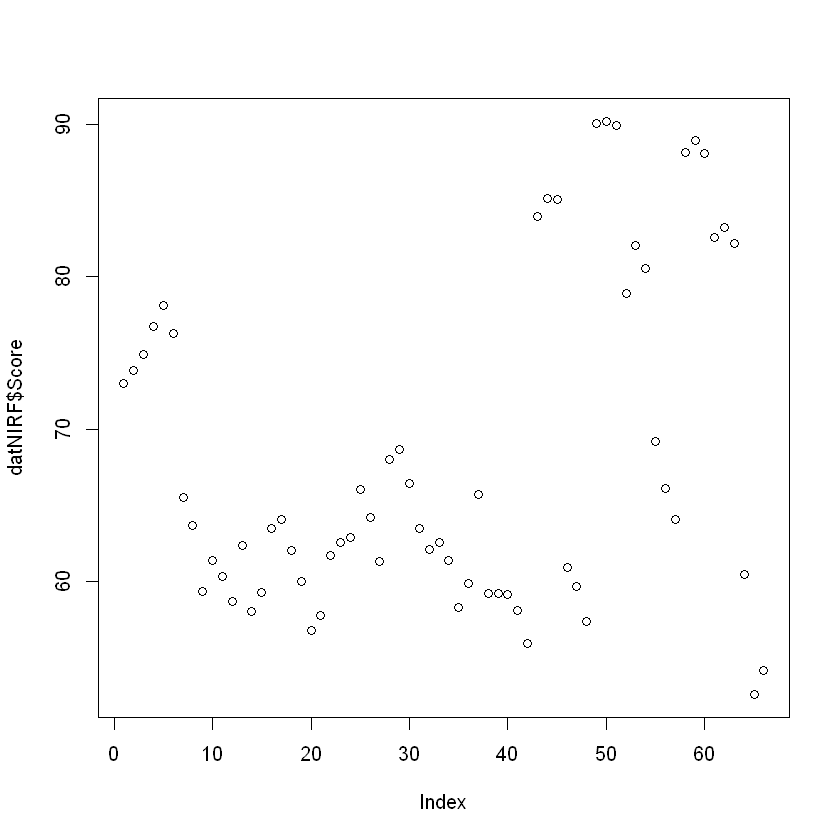

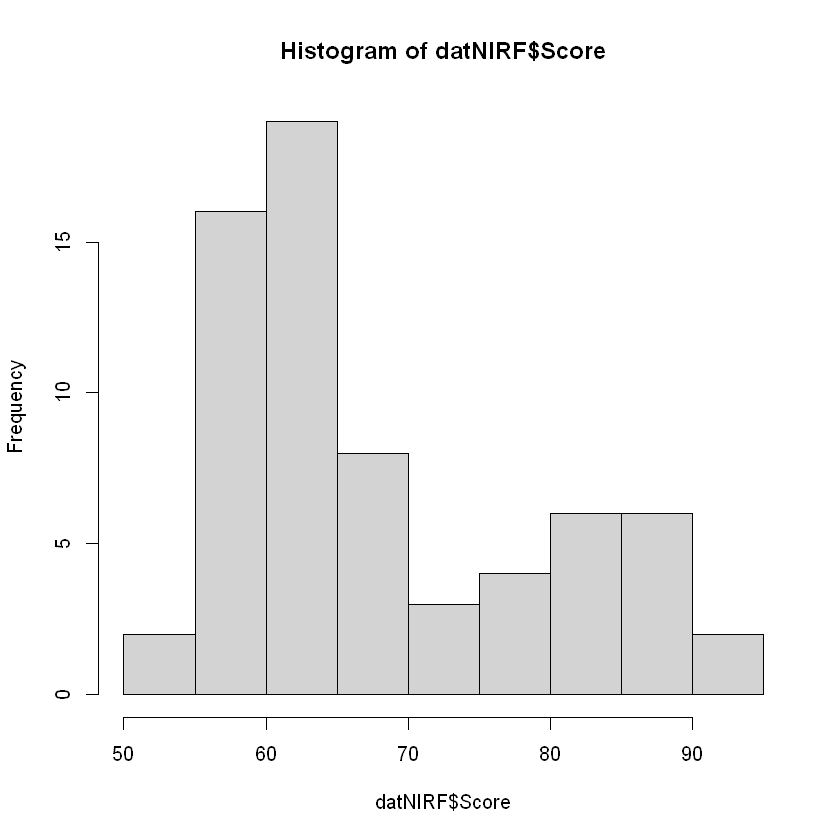

In [9]:
plot(datNIRF$Score) # Score is what shows up as a sequence of ranks
hist(datNIRF$Score)

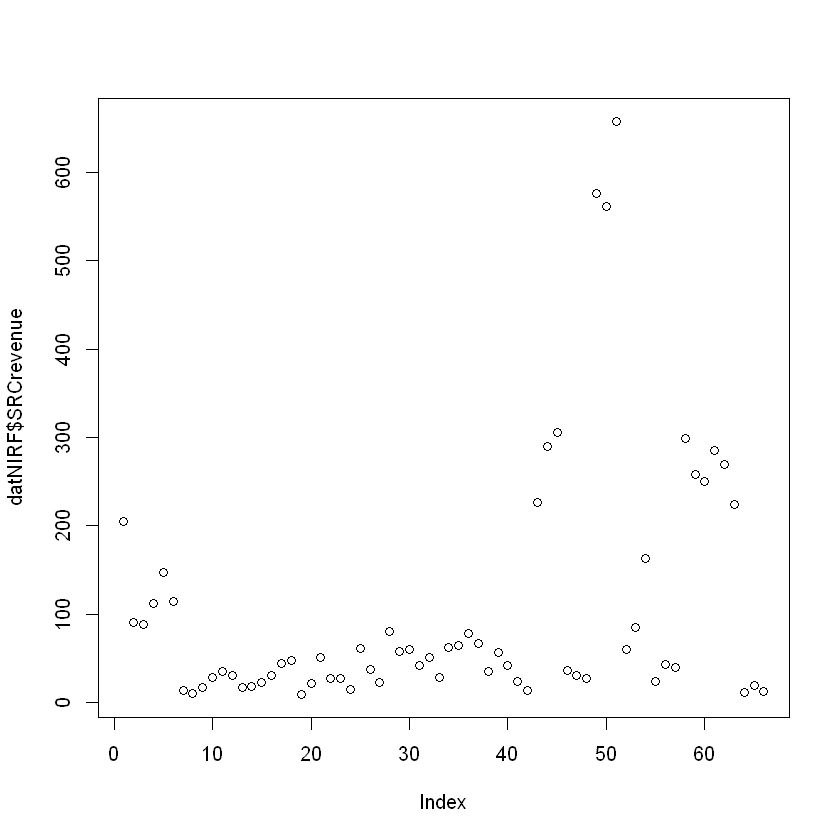

In [10]:
# Score seems to have a bi-modal distribution, with a possible break <= 75.
plot(datNIRF$SRCrevenue)

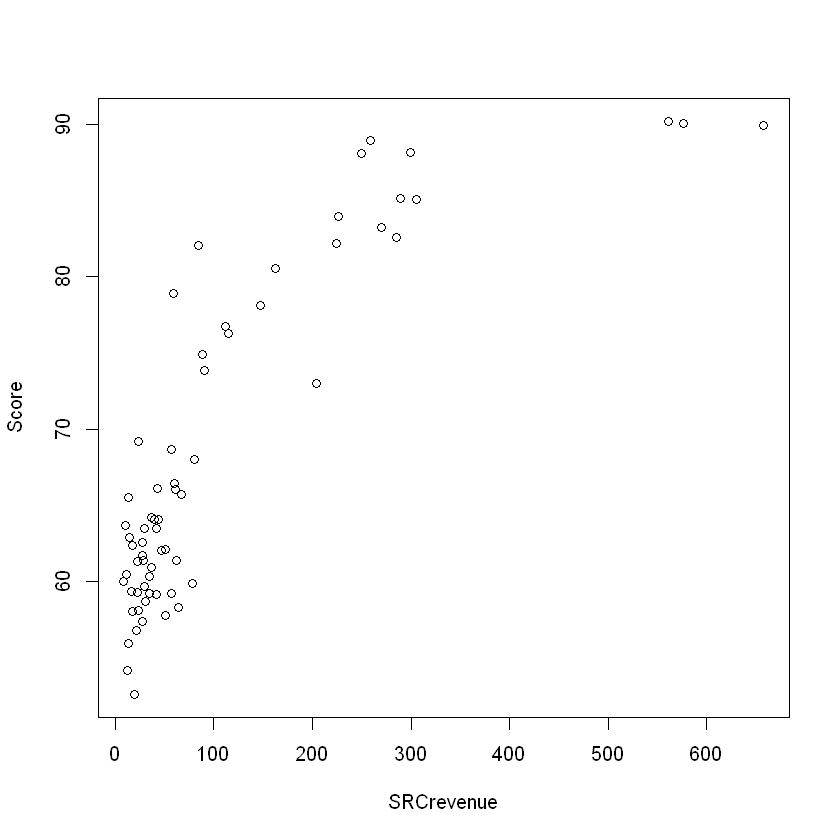

In [11]:
plot(Score ~ SRCrevenue, data=datNIRF)

In [12]:
# From the above plots, it looks like SRCrevenue (Sponsored Research + Consultancy projects)
# itself can explain (NIRF) Score quite well. It reminds of a classical "saturation curve".
# Couple of points to the upper left of that curve are worth investigating: they have managed
# high (near 80) Score with < Rs 100cr SRCrevenue; refer (a) IR-E-U-0573, (b) IR-E-U-0467 and IR-E-U-0013,
# (c) IR-E-U-0237, IR-E-U-0575, and IR-E-U-0490.  IR-E-U-0053 is on the other (right) side of the curve at
# (200, 73) and might raise Score next year.

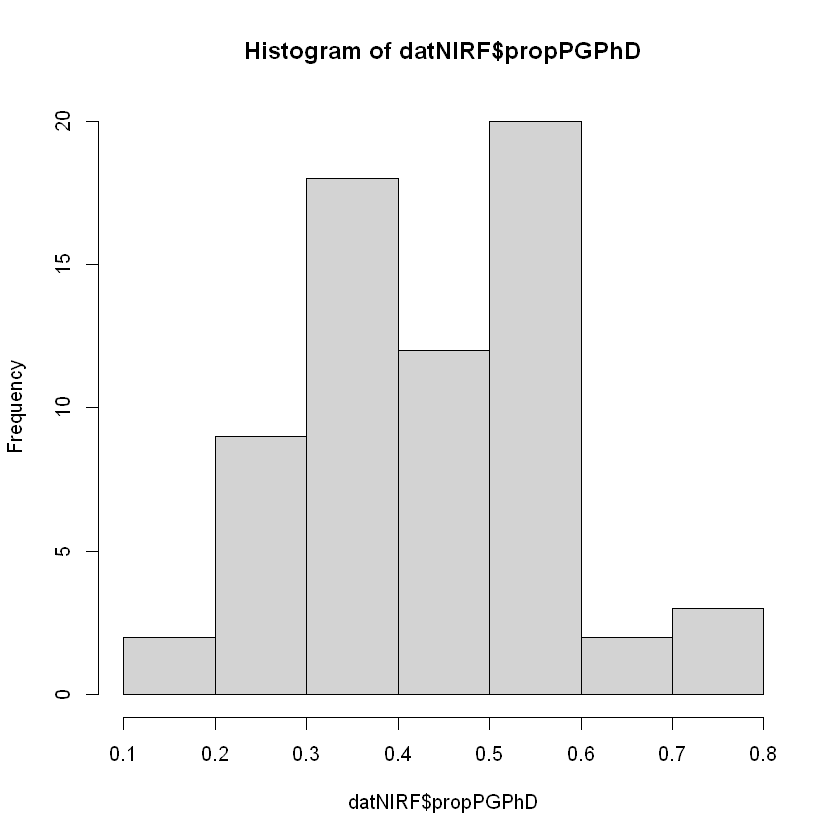

In [13]:
hist(datNIRF$propPGPhD)

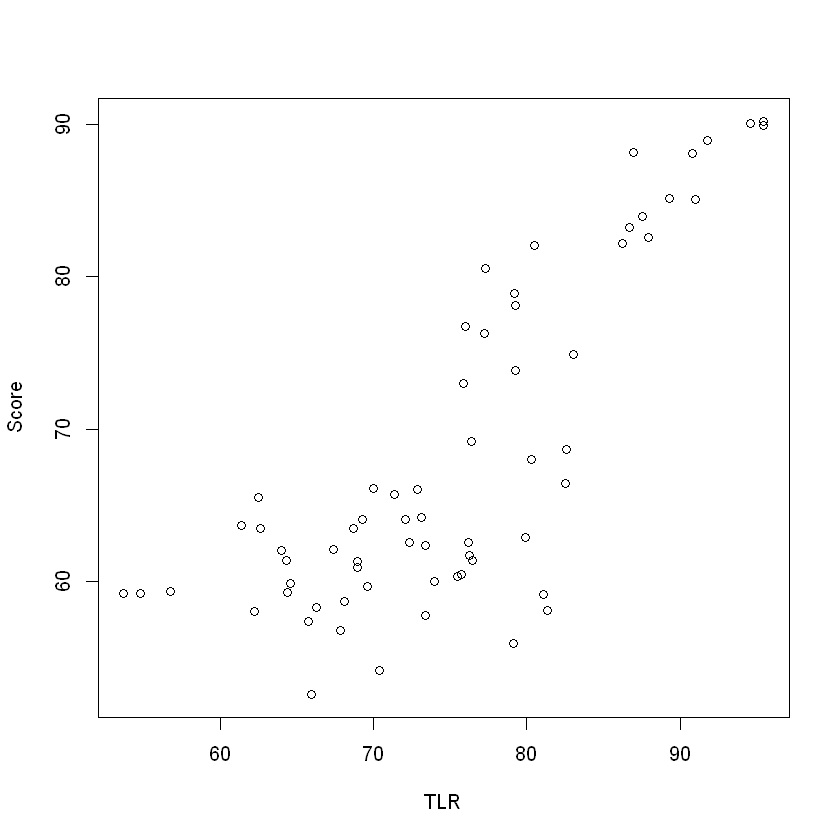

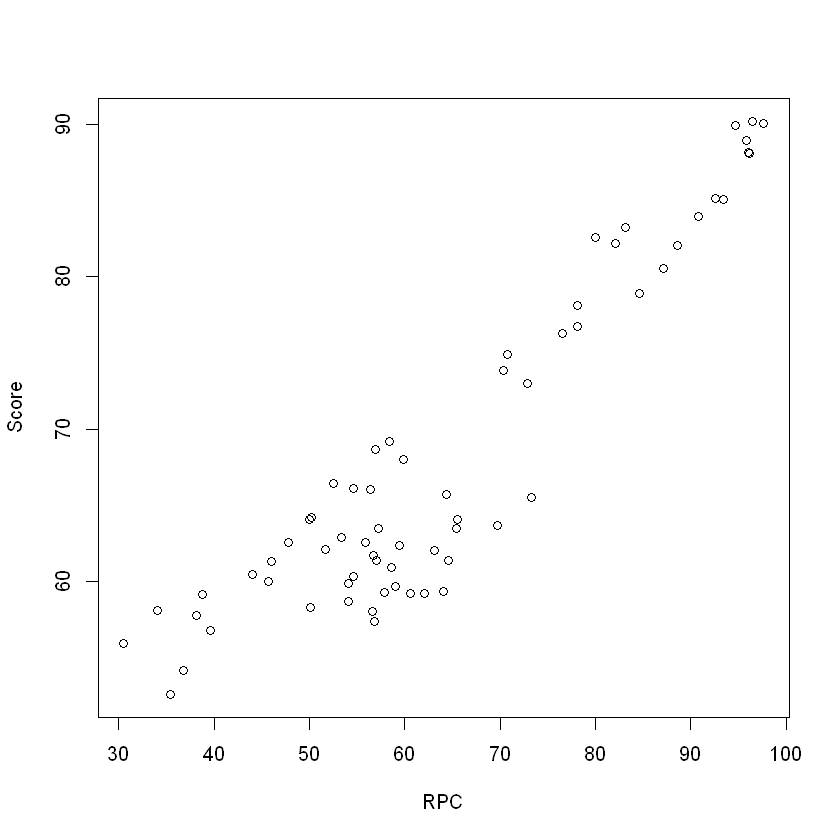

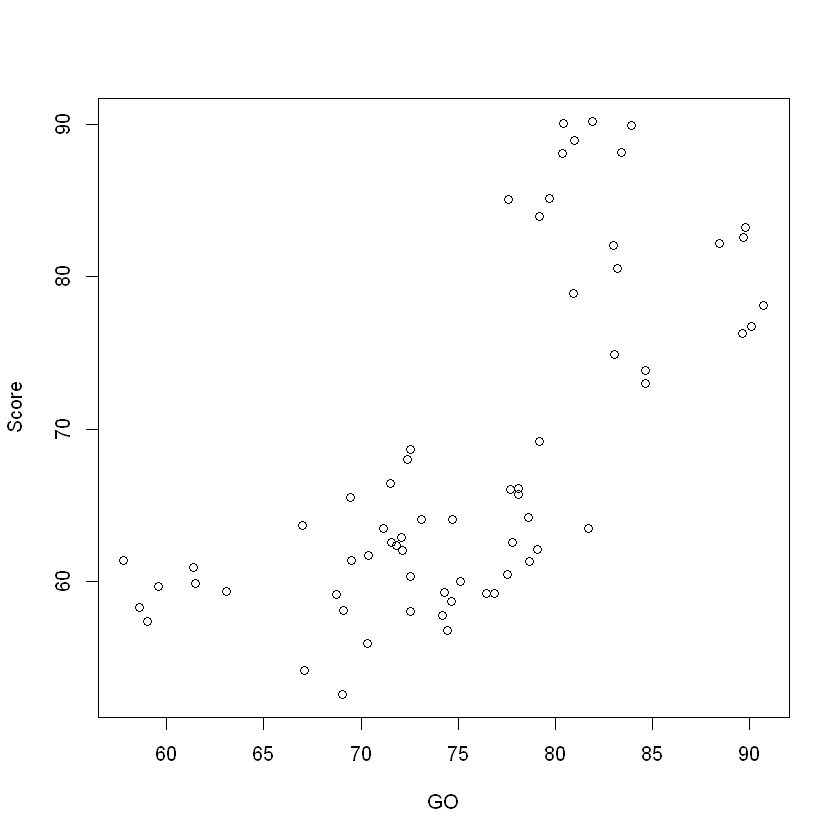

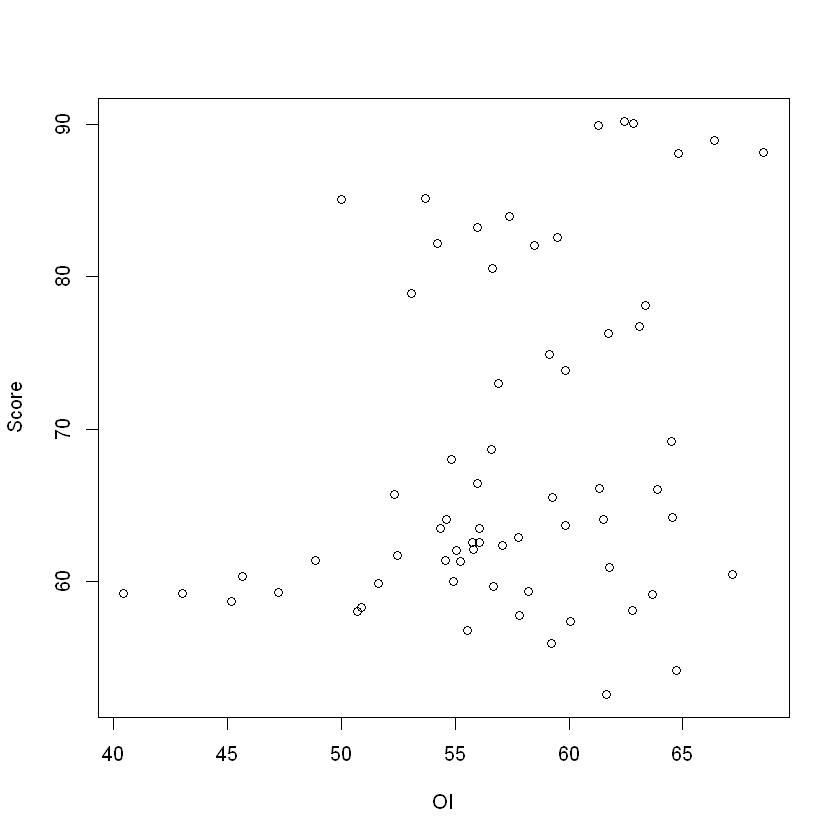

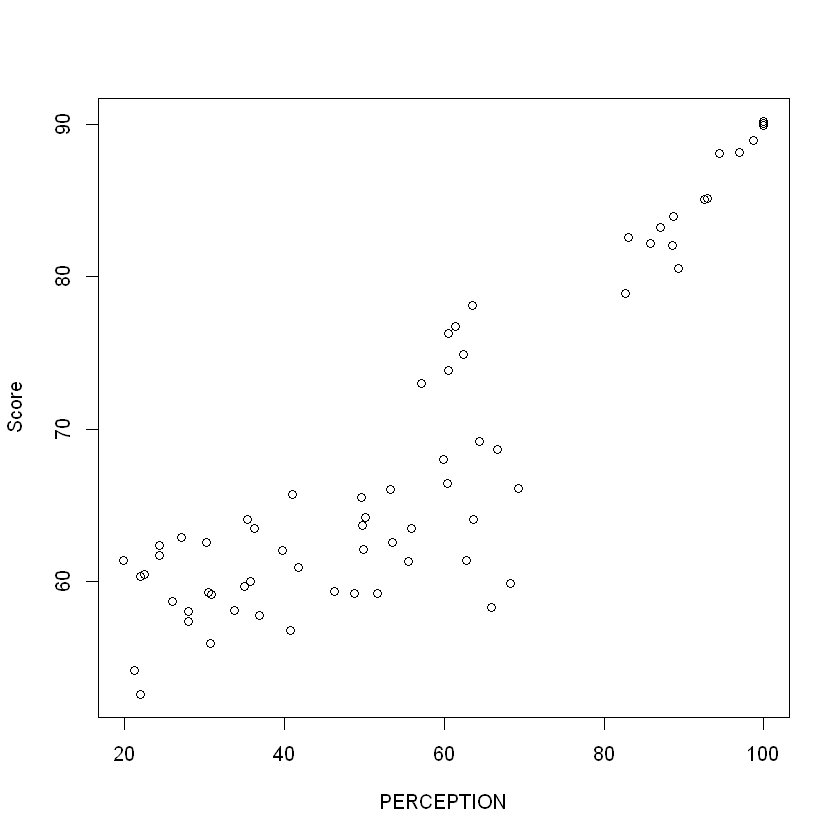

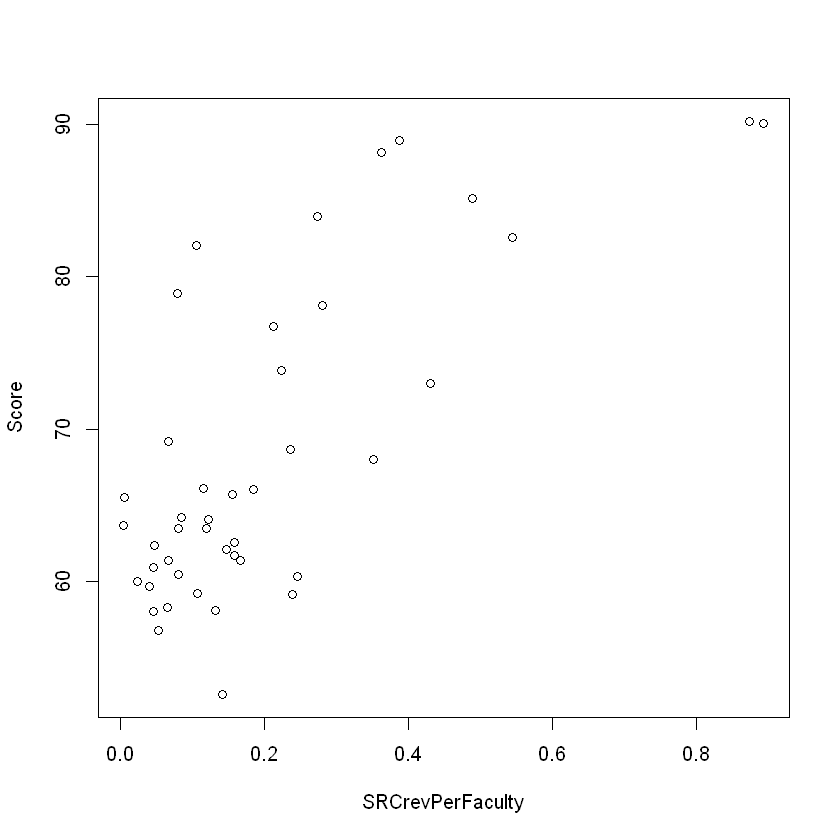

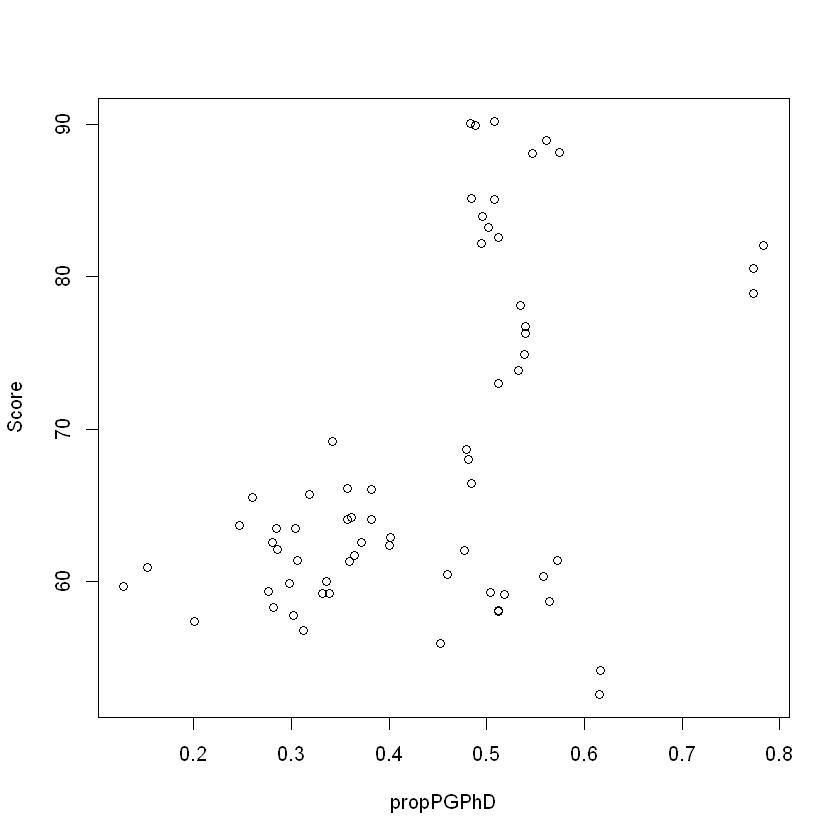

In [14]:
plot(Score ~ TLR+RPC+GO+OI+PERCEPTION +SRCrevPerFaculty +propPGPhD, data=datNIRF)

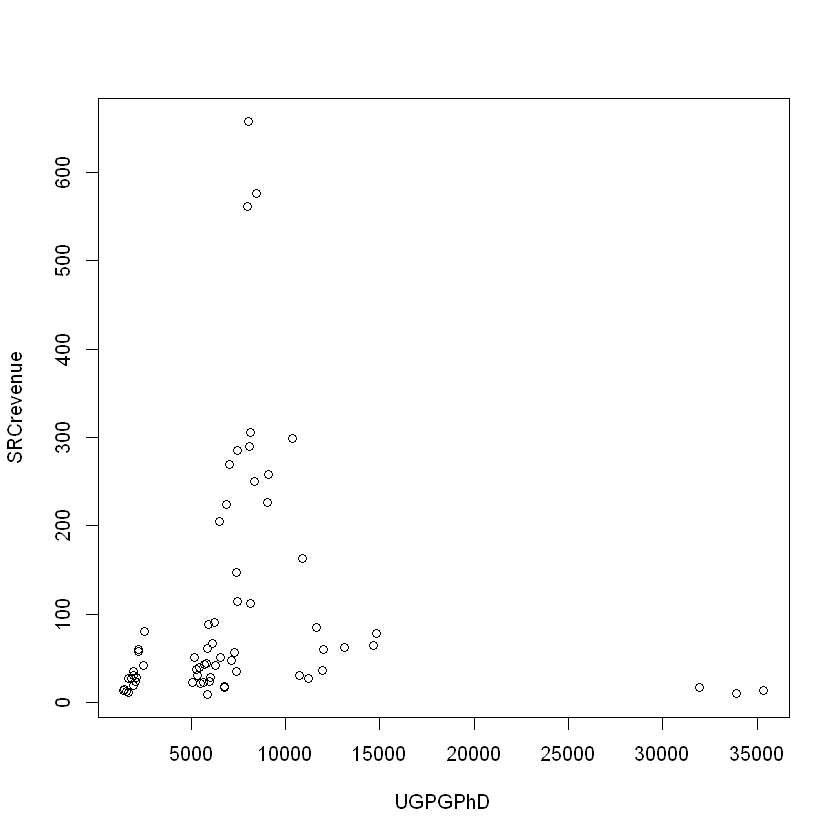

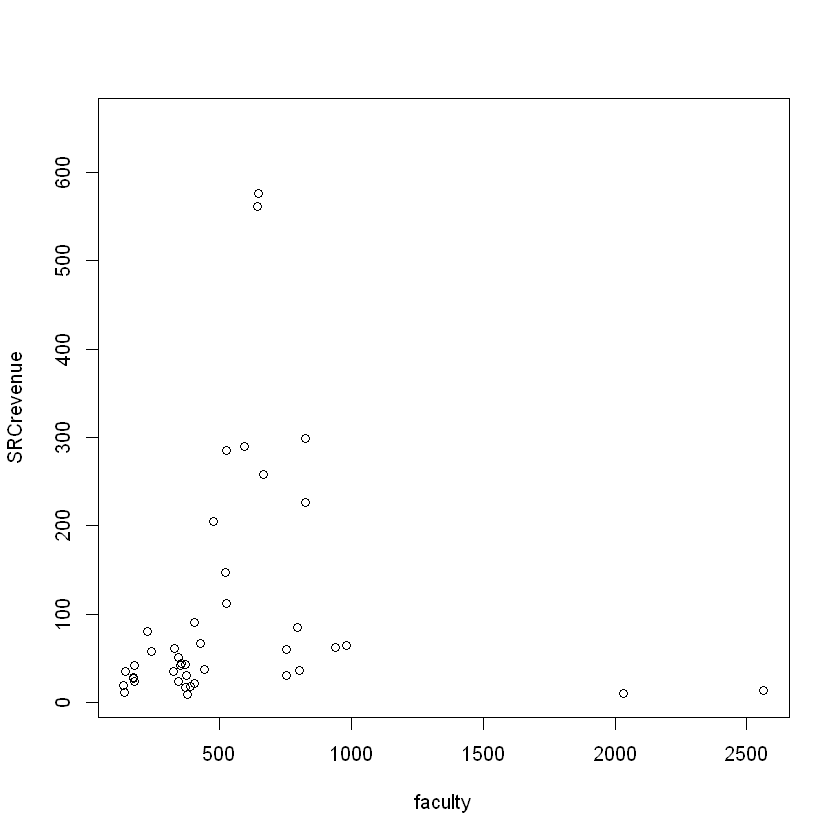

In [15]:
plot(SRCrevenue ~ UGPGPhD + faculty, data=datNIRF)

In [16]:
# Looks like SRCrevenue > Rs. 75cr is associated with "faculty" > 500.

In [17]:
mytable <- (tapply(datNIRF$SRCrevenue, datNIRF$year, summary)); mytable

$`2021`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.88   27.82   43.06  100.66   88.62  561.19 

$`2020`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.66   23.55   48.88  105.59  107.82  658.17 

$`2022`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.77   27.59   50.67  105.11  103.76  576.95 


In [18]:
# as per year-wise summaries: min and max reduced after 2020, but median and mean bounced back.
# maybe pandemic-related effect.

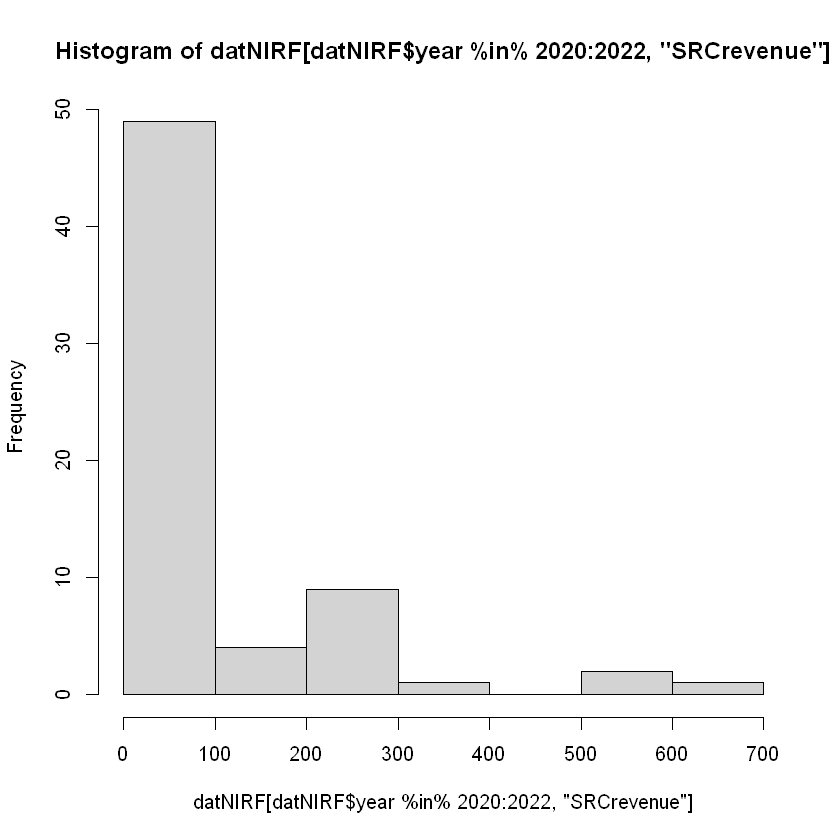

In [19]:
hist(datNIRF[datNIRF$year %in% 2020:2022, "SRCrevenue"])

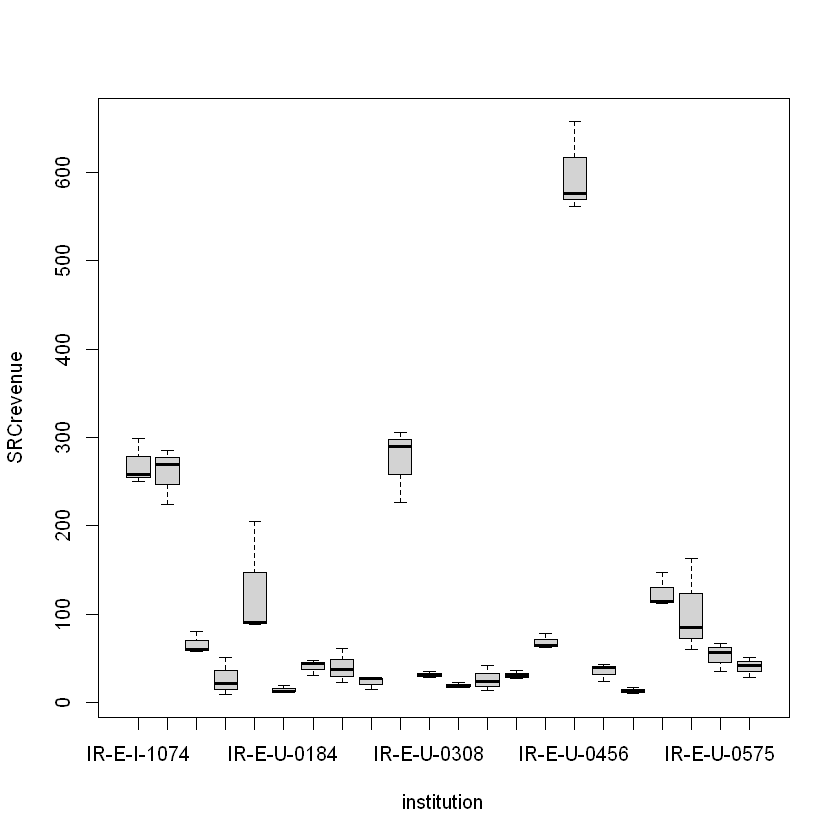

In [20]:
boxplot(SRCrevenue ~ institution, data=datNIRF) # beware: just 3 points in each box!

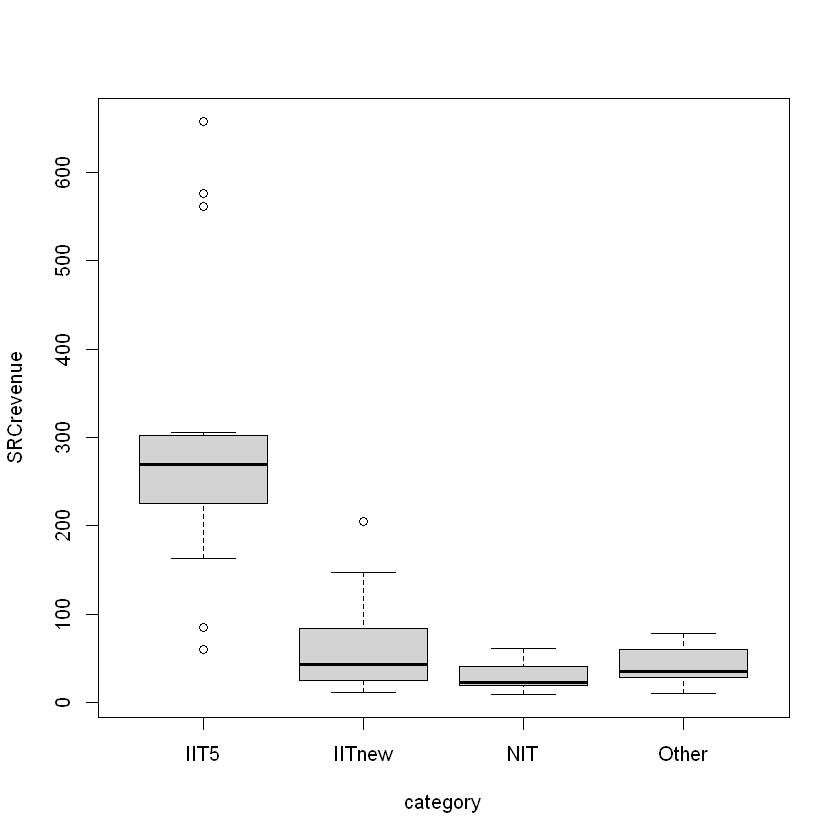

In [21]:
boxplot(SRCrevenue ~ category, data=datNIRF)

In [22]:
# Option #1:
# As per NIRF, Rank {1:N} is on sorted (descending) order of Score, where Score = wtSum(TLR+RPC+GO+OI+PERCEPTION).
# Suppose a result success is a Score >= Score.target eg Score.target 75 considering associated Rank <= 5.
# Past Score and component indicators (eg TLR or RPC) for each institution, but they do not seem controllable
# for future success ie they cannot be directly worked for.
# Ignoring institution+year+ the following seem to be controllable variables:
# UGactualStudents+PGactualStudents+FROsalaries+FROmtce+FROseminars+SRprojects+SRagencies+SRamount
# +Cprojects+Corgs+Camount+faculty
# +UGPGPhD+propPGPhD+FROcost+SRCrevenue+SRCrevPerFaculty
#
# Option #2:
# Consider SRCrevenue as the dependent (response) variable. Operationally, this is important for institutions,
# just as for any body corporate. It also impacts sustainability. Staying alive :-).

cOptionModel <- c(1, 2)[1] # choose which option.
dat <- cbind(datNIRF, ScoreSuccess=(datNIRF$Score >= 75))
# dat$year <- as.factor(dat$year) # coz (impact of) dip in between could be missed if "year" is treated ordinally.
# dat$institution <- as.factor(dat$institution) # coz "institution" is repeated in data across years.

In [23]:
summary(dat)

     ror                 institution   year    UGactualStudents
 Length:66          IR-E-I-1074: 3   2021:22   Min.   :  615   
 Class :character   IR-E-I-1075: 3   2020:22   1st Qu.: 2573   
 Mode  :character   IR-E-U-0013: 3   2022:22   Median : 3656   
                    IR-E-U-0025: 3             Mean   : 4615   
                    IR-E-U-0053: 3             3rd Qu.: 4300   
                    IR-E-U-0184: 3             Max.   :26185   
                    (Other)    :48                             
 PGactualStudents  PhDpursuing      FROsalaries        FROmtce      
 Min.   : 124.0   Min.   : 279.0   Min.   : 36.85   Min.   : 17.65  
 1st Qu.: 773.5   1st Qu.: 650.8   1st Qu.: 84.34   1st Qu.: 63.37  
 Median :1298.0   Median :1161.0   Median :121.05   Median : 88.27  
 Mean   :1724.5   Mean   :1380.3   Mean   :170.76   Mean   :139.08  
 3rd Qu.:1933.5   3rd Qu.:2106.0   3rd Qu.:244.39   3rd Qu.:139.87  
 Max.   :6870.0   Max.   :3332.0   Max.   :560.21   Max.   :459.24  
     

In [24]:
varNames <- setdiff(colnames(dat), c("institution", "Score")) # "Rank"
warning("faculty counts are unavailable in 2020 data. Including that variable loses that year's data.")
varNames.resp <- c("pScore", "SRCrevenue")[cOptionModel]
varNames.explan <- setdiff(varNames, c(varNames.resp,
                                       c("ror"), # c("faculty", "SRCrevPerFaculty"), # optionally to retain year2020 data.
                                       switch(cOptionModel,
                                              { # 1 ie "pScore". So drop those those that directly use it or sum to it.
                                                  c("Rank", "ScoreSuccess"
                                                    # ,c("TLR", "RPC")
                                                    ,c("TLR", "RPC", "GO", "OI", "PERCEPTION")
                                                   )
                                              },
                                              { # 2 ie "SRCrevenue". So drop those that sum to it or its ratio.
                                                  c("SRamount", "Camount", "SRCrevPerFaculty")
                                              }),
                                       c("id", "name", "type", "works_api_url", "homepage", "image", "thumbnail"),
                                       c("works_count", "TC", "TCperWork") # coz these are cumulative across varying years.
                                      )
                          )
fmla1b <- as.formula(paste(varNames.resp, "~", paste(varNames.explan, collapse="+"))); fmla1b # <- fmla1 earlier

Warning message in eval(expr, envir, enclos):
"faculty counts are unavailable in 2020 data. Including that variable loses that year's data."


pScore ~ year + UGactualStudents + PGactualStudents + PhDpursuing + 
    FROsalaries + FROmtce + FROseminars + SRprojects + SRagencies + 
    SRamount + Cprojects + Corgs + Camount + faculty + category + 
    UGPGPhD + propPGPhD + propPhD + FROcost + SRCrevenue + SRCrevPerFaculty + 
    works_count2021 + TC2021 + works_count2022 + TC2022 + TCperWork2021 + 
    TCperWork2022 + works2022perFaculty

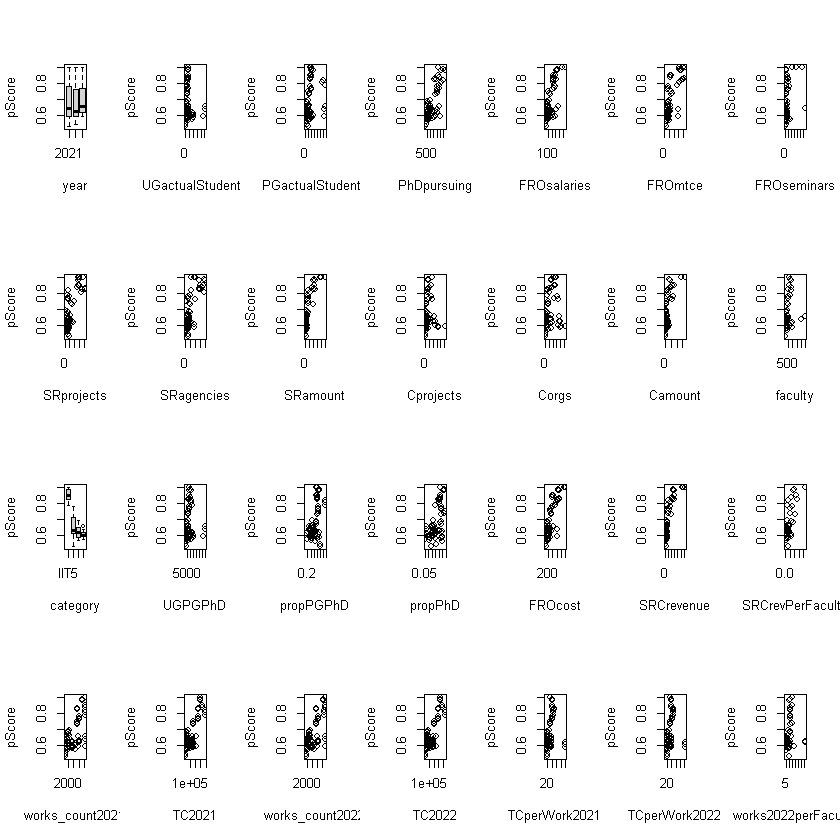

In [25]:
    tmp.ncol <- 7; par(mfrow=c(ceiling(length(varNames.explan) / tmp.ncol), tmp.ncol))
      plot(fmla1b, data=dat, main="")

In [26]:
mustInstall <- FALSE; if(mustInstall){
    install.packages(c("pscl", "lmtest", "sandwich"))
}
require(pscl) # for odTest()
require(lmtest) # for coeftest()
require(sandwich) # for sandwich()
source("C://Users/SONY/Downloads/worldClass/src-modelDifficultyHelp1.R")

Loading required package: pscl

Warning message:
"package 'pscl' was built under R version 4.2.1"
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 4.2.1"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.1"



Call:
glm(formula = fmla1b, data = dat)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.027479  -0.010275   0.000000   0.007636   0.034235  

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          3.605e-01  1.110e-01   3.248  0.00541 **
year2022             1.329e-02  9.878e-03   1.345  0.19851   
UGactualStudents    -1.962e-05  7.592e-06  -2.585  0.02071 * 
PGactualStudents    -2.956e-05  2.639e-05  -1.120  0.28041   
PhDpursuing         -2.057e-05  3.596e-05  -0.572  0.57570   
FROsalaries          4.646e-04  3.125e-04   1.487  0.15777   
FROmtce              3.903e-04  1.568e-04   2.488  0.02508 * 
FROseminars         -2.138e-03  3.930e-03  -0.544  0.59449   
SRprojects          -4.322e-05  9.585e-05  -0.451  0.65849   
SRagencies           6.471e-04  5.374e-04   1.204  0.24722   
SRamount            -9.217e-04  4.971e-04  -1.854  0.08350 . 
Cprojects            1.07

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)          3.6050e-01  6.6317e-02  5.4360 5.448e-08 ***
year2022             1.3289e-02  6.3824e-03  2.0821 0.0373320 *  
UGactualStudents    -1.9624e-05  4.0107e-06 -4.8930 9.932e-07 ***
PGactualStudents    -2.9555e-05  1.5346e-05 -1.9258 0.0541266 .  
PhDpursuing         -2.0573e-05  2.0835e-05 -0.9874 0.3234424    
FROsalaries          4.6465e-04  1.2999e-04  3.5744 0.0003511 ***
FROmtce              3.9026e-04  7.7517e-05  5.0345 4.791e-07 ***
FROseminars         -2.1379e-03  1.6931e-03 -1.2627 0.2066837    
SRprojects          -4.3223e-05  6.3072e-05 -0.6853 0.4931522    
SRagencies           6.4706e-04  2.9114e-04  2.2225 0.0262520 *  
SRamount            -9.2171e-04  3.1703e-04 -2.9073 0.0036452 ** 
Cprojects            1.0727e-04  3.4245e-05  3.1324 0.0017336 ** 

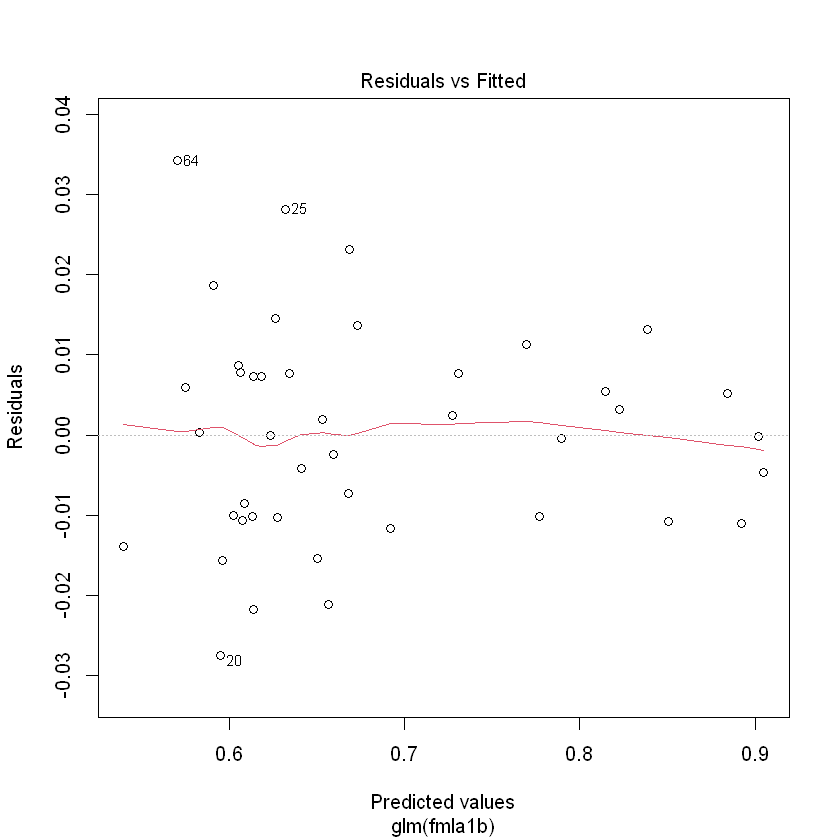

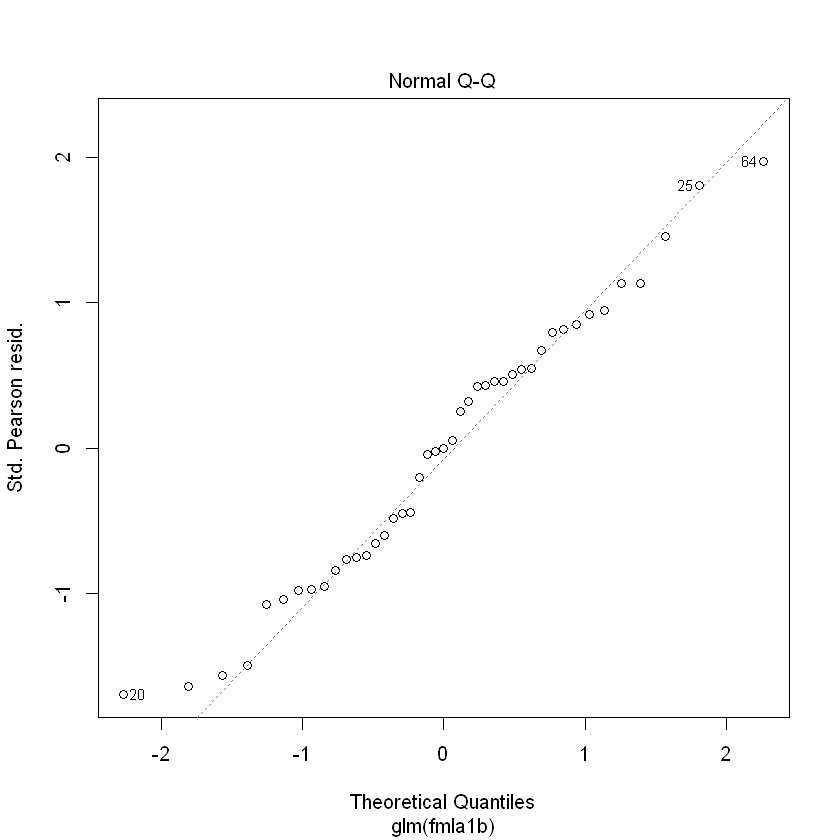

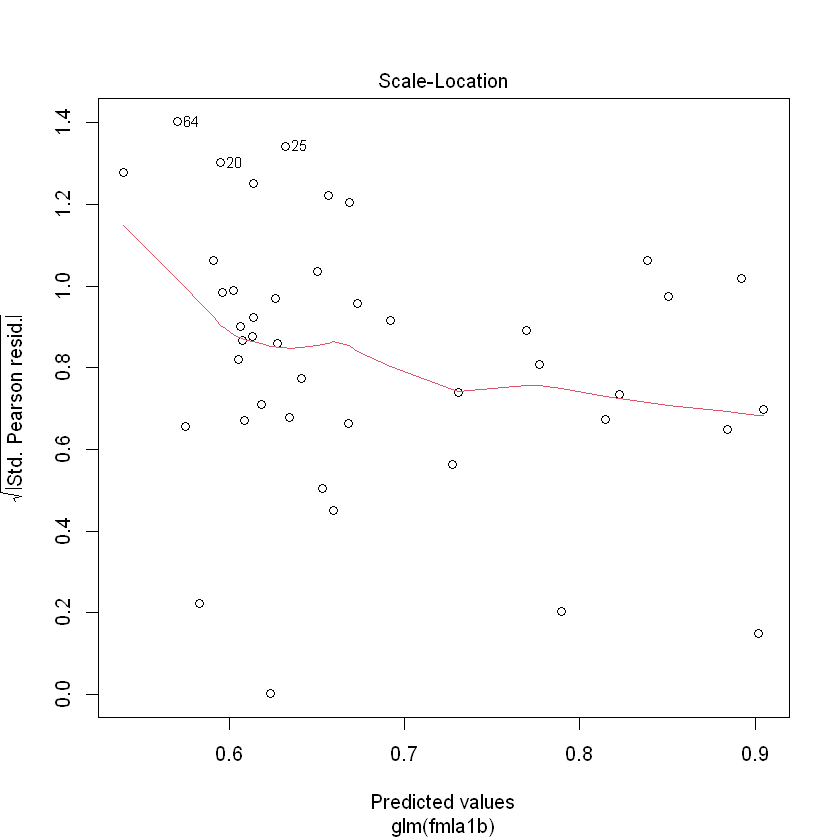

[1] 0

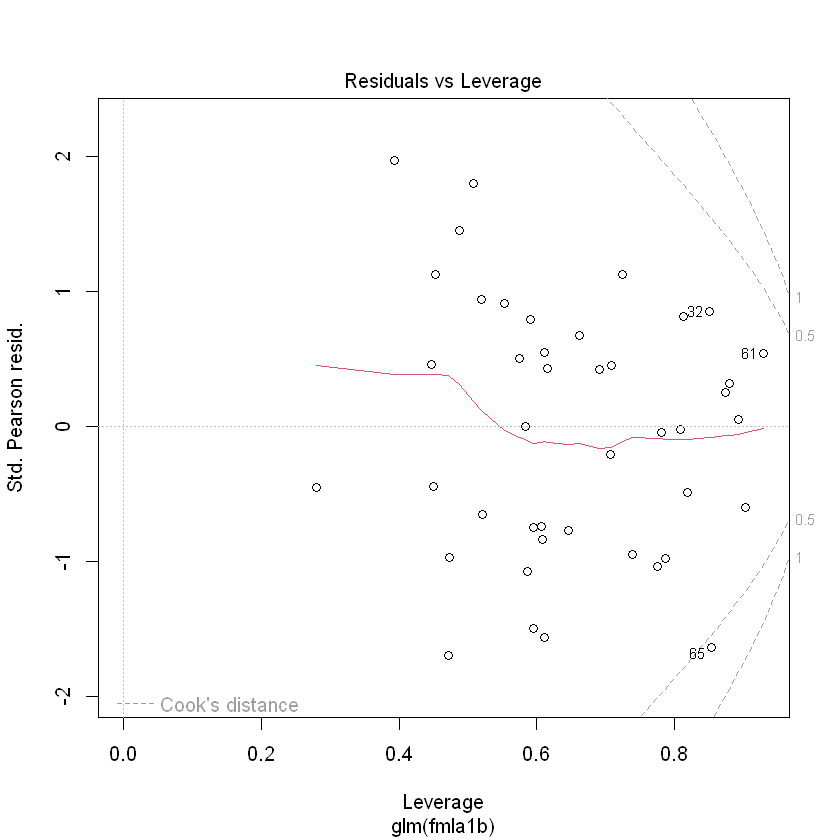

In [27]:
m1.gau.id.def <- glm(fmla1b, data=dat)
summary(m1.gau.id.def)
myGOFglm(m1.gau.id.def)

In [28]:
m10.gau.id.def <- update(m1.gau.id.def, . ~ . + 0) # as.formula(". ~ . + 0")) to model without intercept.
summary(m10.gau.id.def)


Call:
glm(formula = pScore ~ year + UGactualStudents + PGactualStudents + 
    PhDpursuing + FROsalaries + FROmtce + FROseminars + SRprojects + 
    SRagencies + SRamount + Cprojects + Corgs + Camount + faculty + 
    category + UGPGPhD + propPGPhD + propPhD + FROcost + SRCrevenue + 
    SRCrevPerFaculty + works_count2021 + TC2021 + works_count2022 + 
    TC2022 + TCperWork2021 + TCperWork2022 + works2022perFaculty - 
    1, data = dat)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.027479  -0.010275   0.000000   0.007636   0.034235  

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)   
year2021             3.605e-01  1.110e-01   3.248  0.00541 **
year2022             3.738e-01  1.117e-01   3.346  0.00442 **
UGactualStudents    -1.962e-05  7.592e-06  -2.585  0.02071 * 
PGactualStudents    -2.956e-05  2.639e-05  -1.120  0.28041   
PhDpursuing         -2.057e-05  3.596e-05  -0.572  0.57570

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
year2021             3.6050e-01  6.6317e-02  5.4360 5.448e-08 ***
year2022             3.7379e-01  6.6527e-02  5.6186 1.925e-08 ***
UGactualStudents    -1.9624e-05  4.0107e-06 -4.8930 9.932e-07 ***
PGactualStudents    -2.9555e-05  1.5346e-05 -1.9258 0.0541266 .  
PhDpursuing         -2.0573e-05  2.0835e-05 -0.9874 0.3234424    
FROsalaries          4.6465e-04  1.2999e-04  3.5744 0.0003511 ***
FROmtce              3.9026e-04  7.7517e-05  5.0345 4.791e-07 ***
FROseminars         -2.1379e-03  1.6931e-03 -1.2627 0.2066837    
SRprojects          -4.3223e-05  6.3072e-05 -0.6853 0.4931522    
SRagencies           6.4706e-04  2.9114e-04  2.2225 0.0262520 *  
SRamount            -9.2171e-04  3.1703e-04 -2.9073 0.0036452 ** 
Cprojects            1.0727e-04  3.4245e-05  3.1324 0.0017336 ** 

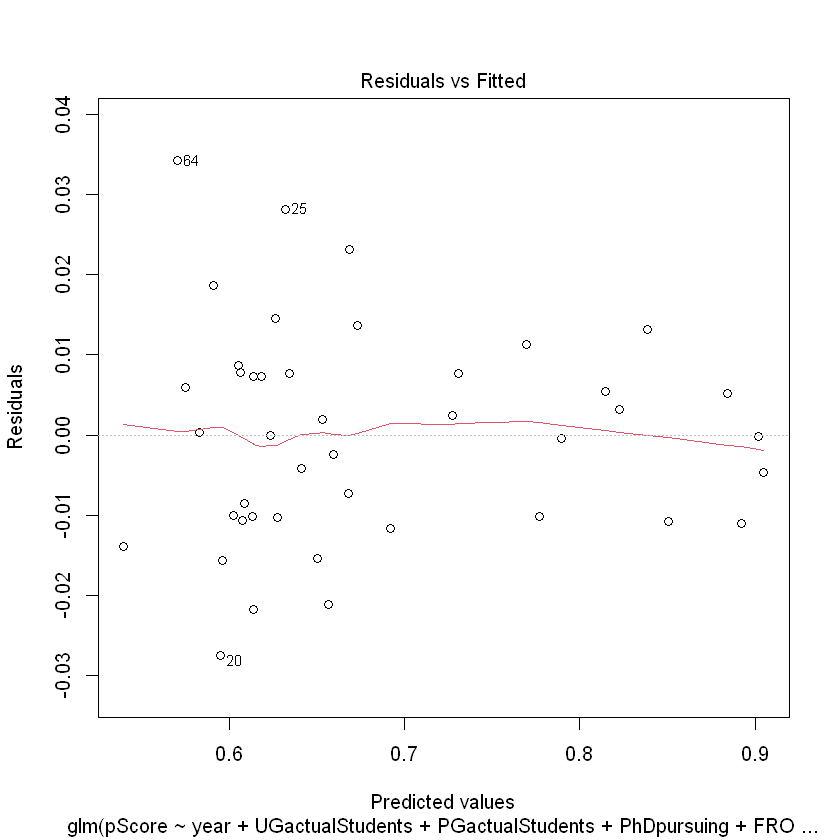

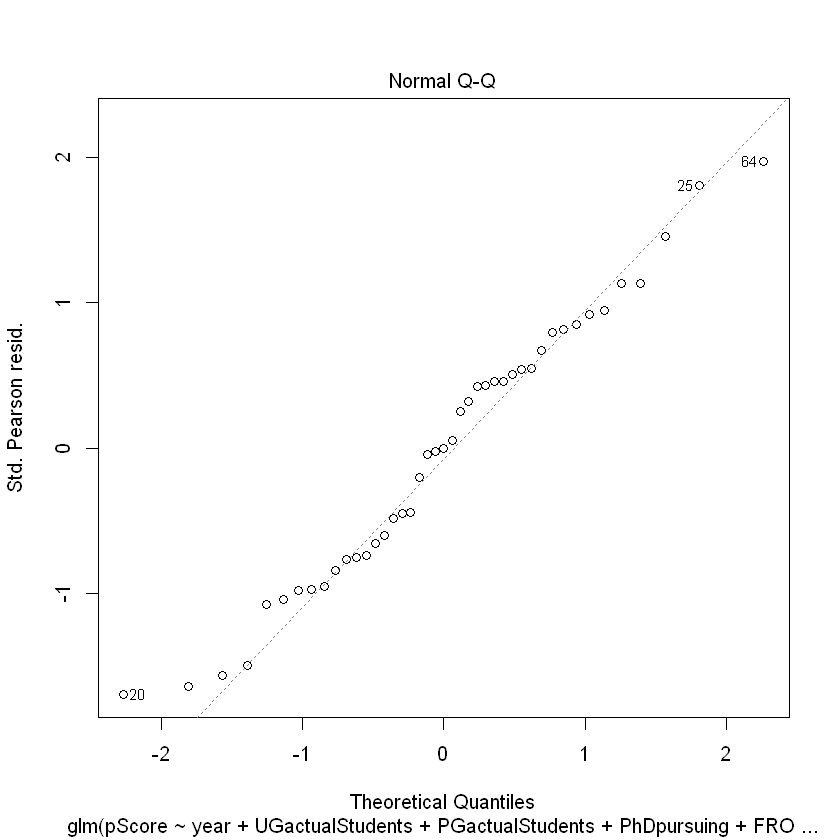

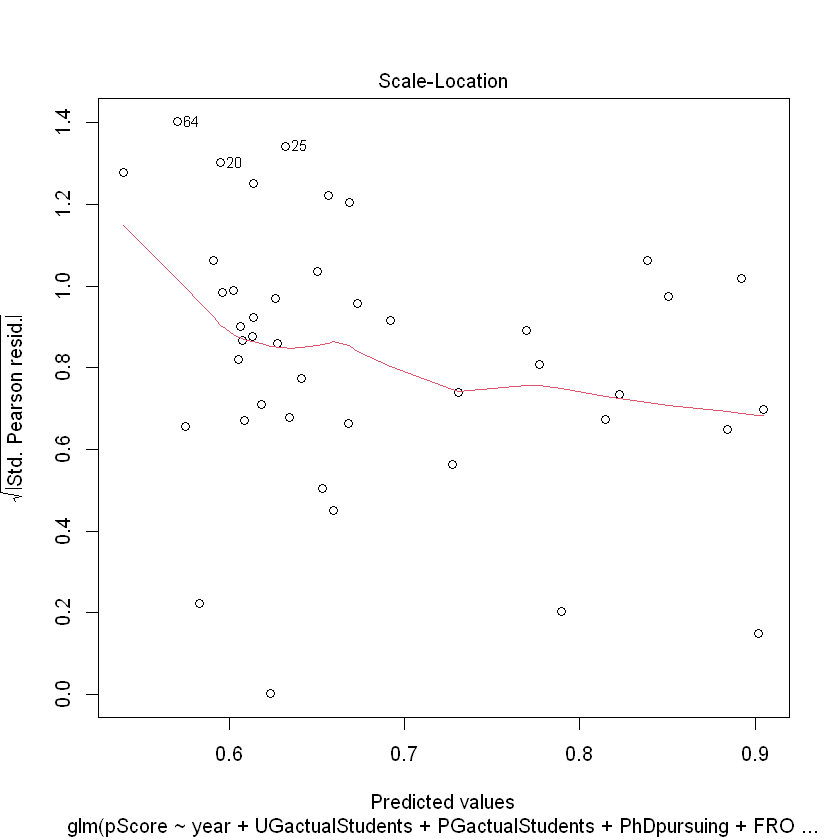

[1] 0

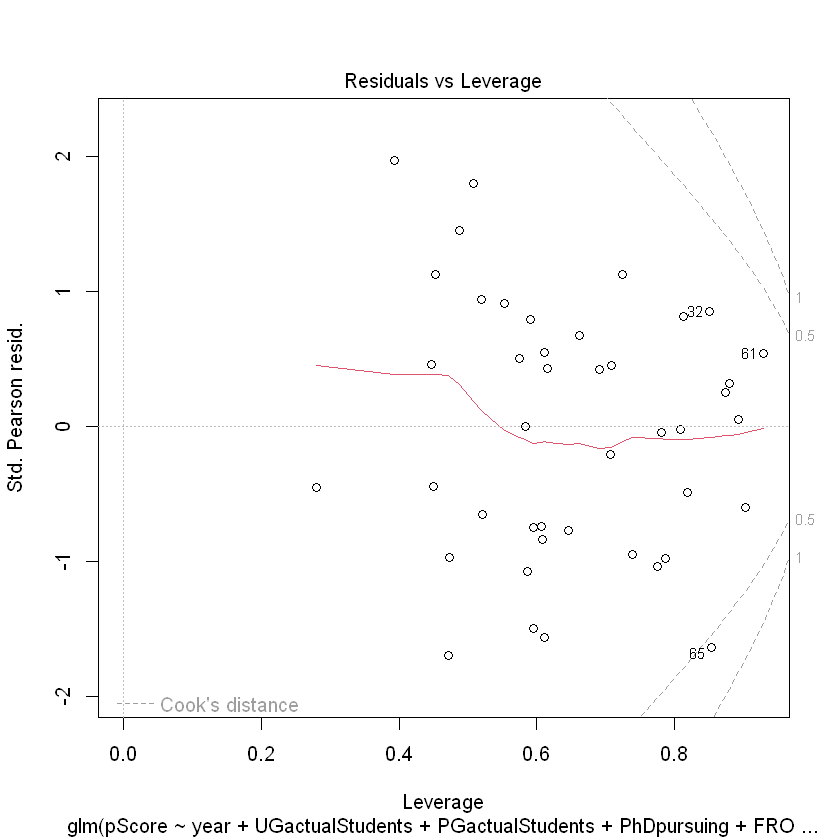

In [29]:
myGOFglm(m10.gau.id.def)

In [30]:
# m1.gau.id.def.signif <- update(m1, . ~ . - UGactualStudents - PGactualStudents - FROsalaries - FROmtce - FROseminars
#                 - SRprojects - SRagencies - Camount - UGPGPhD - propPGPhD - FROcost - SRCrevenue)
#   # as per the robust sandwich covar-matrix estimator, drop variables that are not significant from the model.
# myGOFglm(m1.gau.id.def.signif)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"



Call:
glm(formula = fmla1b, family = binomial(link = "logit"), data = dat)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.042569  -0.017807   0.001935   0.014041   0.072430  

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error z value Pr(>|z|)
(Intercept)         -8.846e-01  1.105e+01  -0.080    0.936
year2022             5.698e-02  1.017e+00   0.056    0.955
UGactualStudents    -7.617e-05  7.272e-04  -0.105    0.917
PGactualStudents    -1.500e-04  2.717e-03  -0.055    0.956
PhDpursuing         -1.264e-04  3.571e-03  -0.035    0.972
FROsalaries          2.862e-03  3.520e-02   0.081    0.935
FROmtce              1.839e-03  1.673e-02   0.110    0.912
FROseminars         -1.645e-02  4.419e-01  -0.037    0.970
SRprojects          -4.196e-04  9.997e-03  -0.042    0.967
SRagencies           2.724e-03  5.312e-02   0.051    0.959
SRamount            -2.146e-03  4.971e-02  -0.043    0.966
Cprojects            4.289

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)         -8.8457e-01  2.8503e-01 -3.1035 0.0019127 ** 
year2022             5.6978e-02  2.5699e-02  2.2171 0.0266131 *  
UGactualStudents    -7.6166e-05  1.6792e-05 -4.5359 5.737e-06 ***
PGactualStudents    -1.5003e-04  6.8900e-05 -2.1776 0.0294384 *  
PhDpursuing         -1.2642e-04  8.4845e-05 -1.4901 0.1362044    
FROsalaries          2.8618e-03  8.5234e-04  3.3576 0.0007861 ***
FROmtce              1.8385e-03  3.8242e-04  4.8075 1.528e-06 ***
FROseminars         -1.6454e-02  9.9851e-03 -1.6478 0.0993853 .  
SRprojects          -4.1959e-04  2.8586e-04 -1.4678 0.1421551    
SRagencies           2.7244e-03  1.1163e-03  2.4406 0.0146617 *  
SRamount            -2.1458e-03  1.2446e-03 -1.7241 0.0846914 .  
Cprojects            4.2890e-04  1.3829e-04  3.1013 0.0019265 ** 

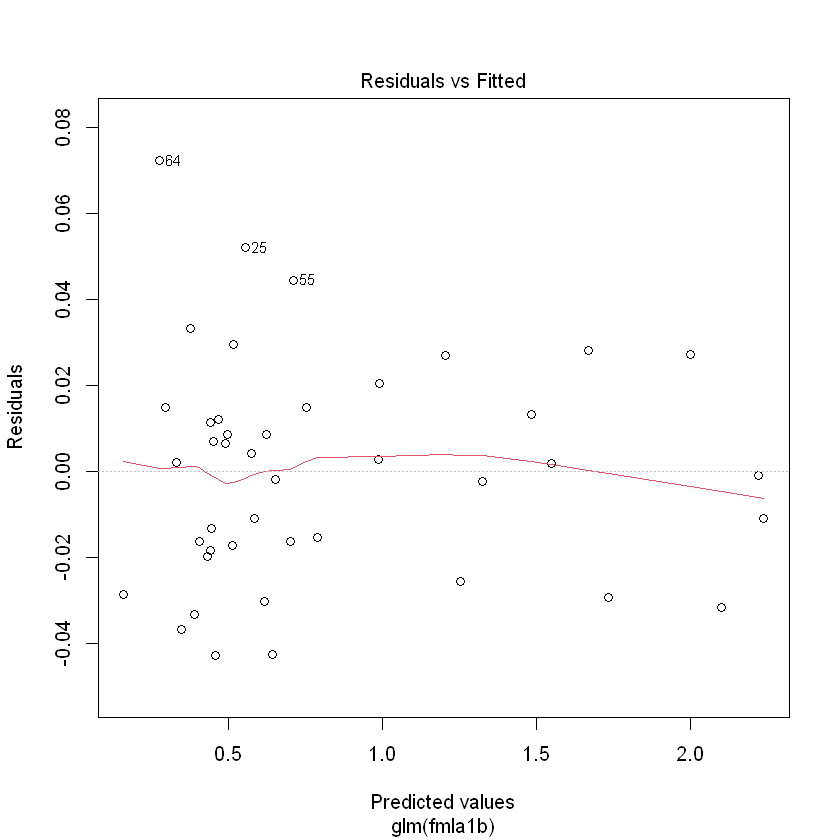

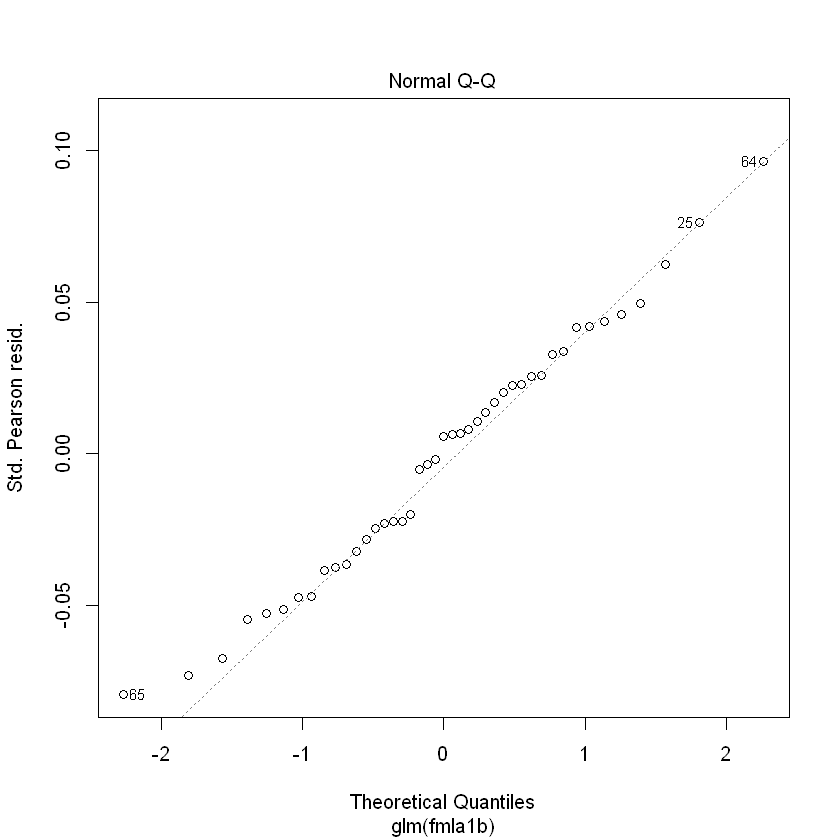

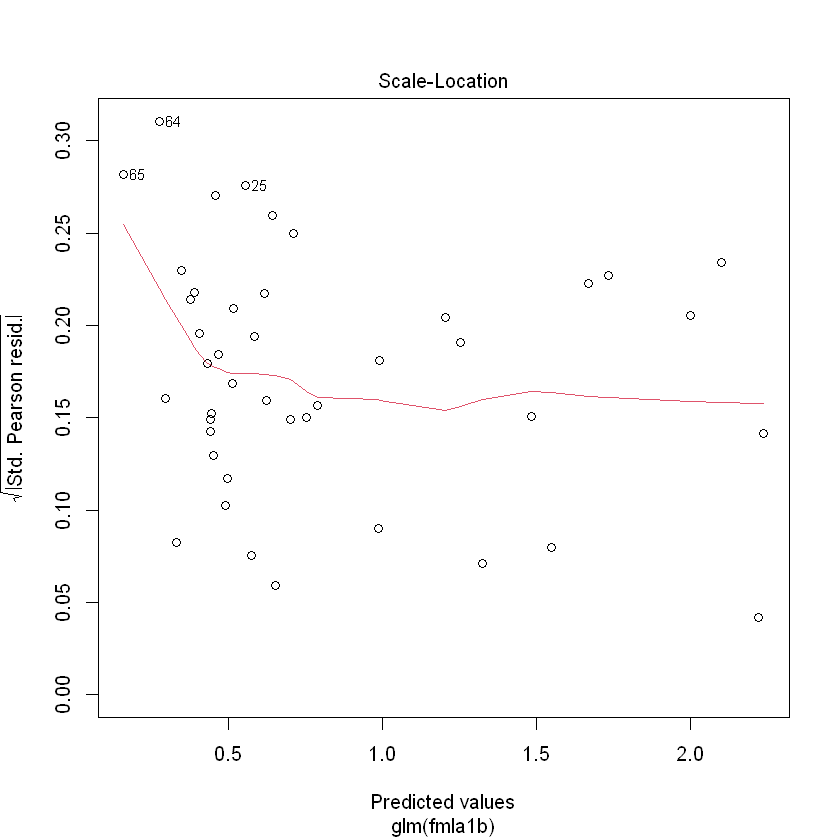

[1] 0.002

  deviance df theta (Shape or Dispersion for NegBinom)    AIC  logLik estVar
1    0.028 15                                       NA 89.758 -16.879     NA
  chkDispersion
1         0.002


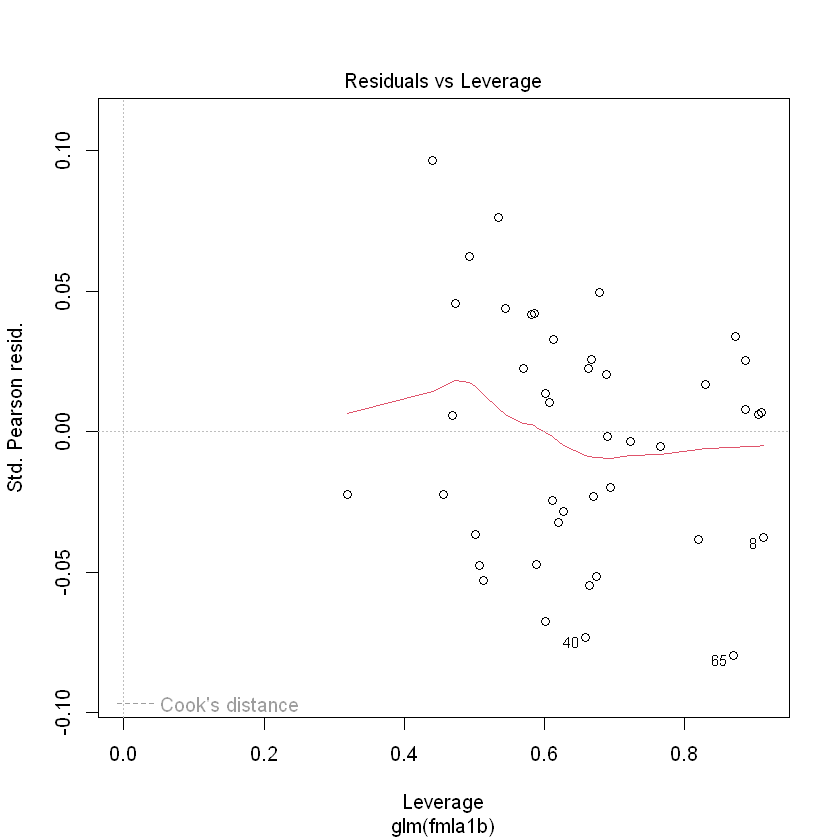

In [31]:
# fmla1b <- update(fmla1, paste("pScore", "~ ."))
m1.bin.logit.def <- glm(fmla1b,
           family=binomial(link="logit"), # weights=wtOffsetVec,
           data=dat)
  # > Warning message ... "non-integer #successes in a binomial glm!"
  # refer https://stackoverflow.com/questions/12953045/warning-non-integer-successes-in-a-binomial-glm-survey-packages.
summary(m1.bin.logit.def)
myGOFglm(m1.bin.logit.def)
m1.bin.logit.def.stat <- myGOFglm.stat(m1.bin.logit.def); print(m1.bin.logit.def.stat)

In [32]:
# exp(-1.2446e+00); exp(1.0213e-01); exp(-8.6766e-01)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)         -4.9708e-01  1.7297e-01 -2.8737 0.0040564 ** 
year2022             3.2982e-02  1.5884e-02  2.0764 0.0378529 *  
UGactualStudents    -4.8037e-05  1.0440e-05 -4.6011 4.203e-06 ***
PGactualStudents    -8.8754e-05  4.1571e-05 -2.1350 0.0327627 *  
PhDpursuing         -7.3401e-05  5.2734e-05 -1.3919 0.1639500    
FROsalaries          1.6985e-03  4.5940e-04  3.6973 0.0002179 ***
FROmtce              1.0803e-03  2.2217e-04  4.8626 1.158e-06 ***
FROseminars         -9.3532e-03  5.4767e-03 -1.7078 0.0876716 .  
SRprojects          -2.1653e-04  1.7045e-04 -1.2704 0.2039491    
SRagencies           1.6572e-03  7.0499e-04  2.3507 0.0187406 *  
SRamount            -1.6463e-03  7.7955e-04 -2.1118 0.0347013 *  
Cprojects            2.6650e-04  8.5664e-05  3.1110 0.0018647 ** 

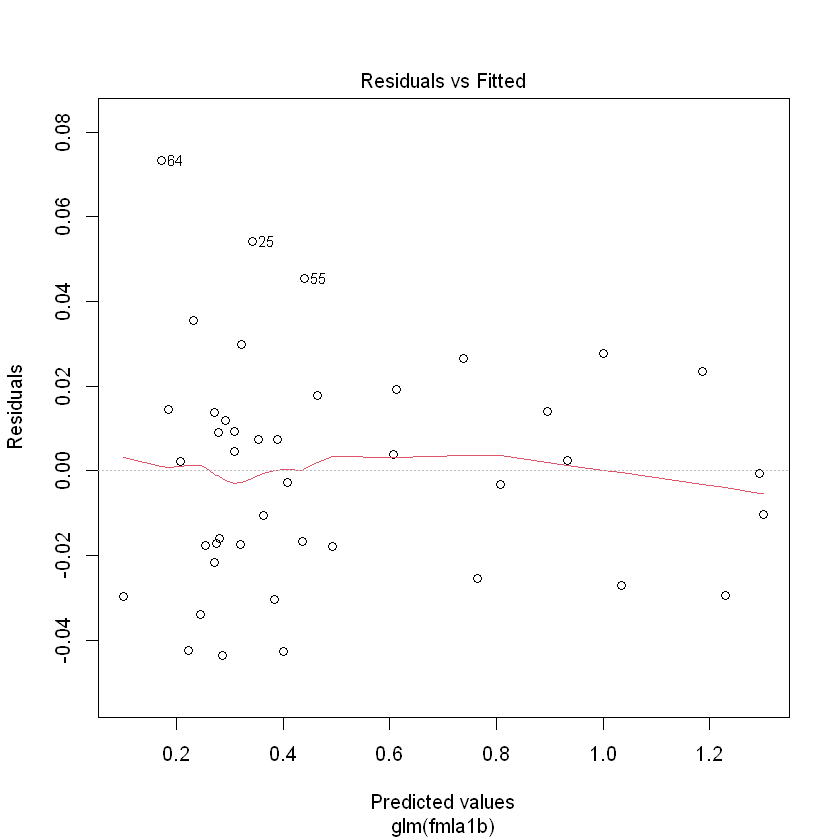

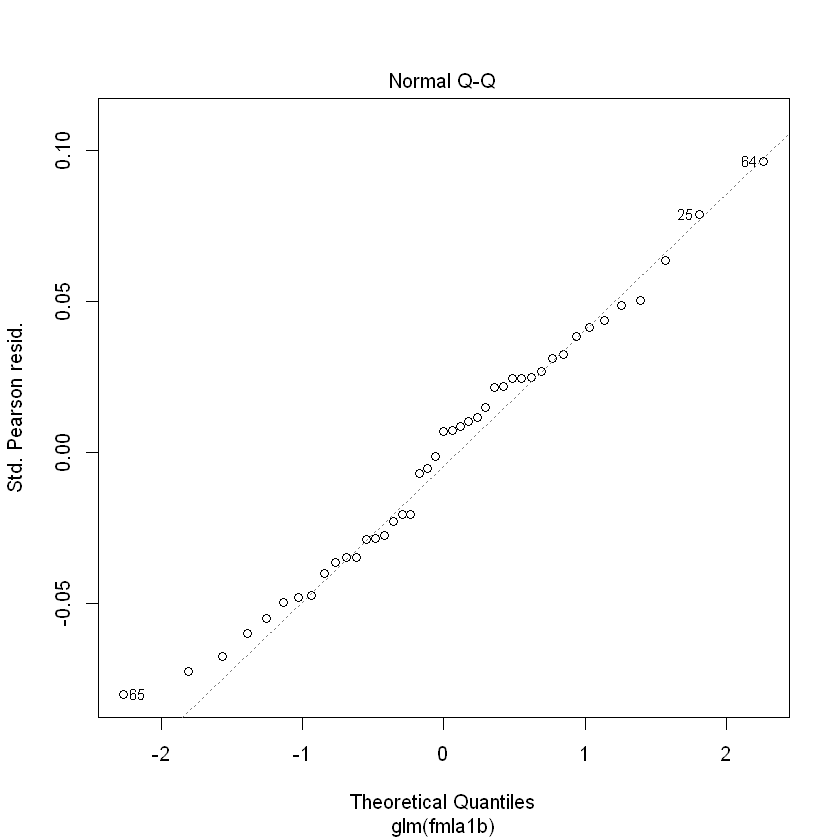

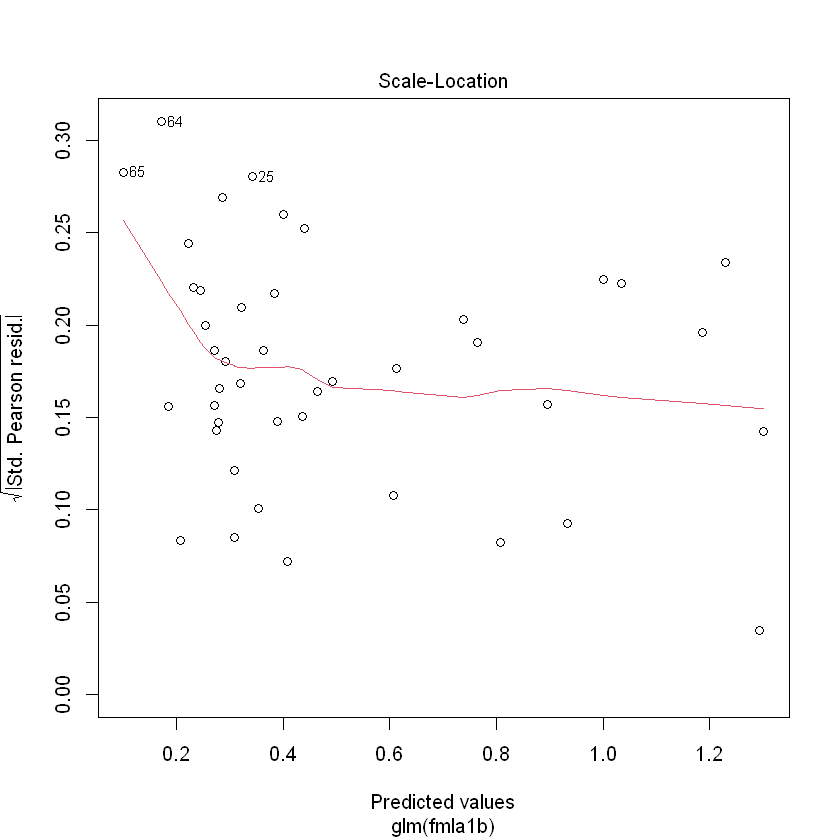

[1] 0.002

  deviance df theta (Shape or Dispersion for NegBinom)    AIC  logLik estVar
1     0.03 15                                       NA 89.757 -16.879     NA
  chkDispersion
1         0.002


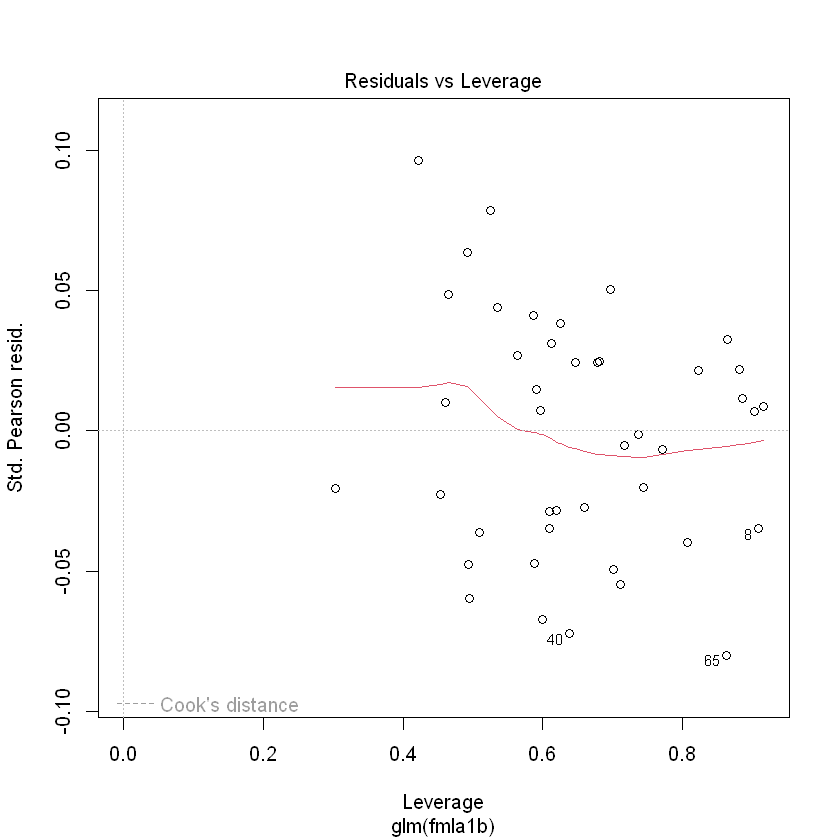

In [33]:
m1.bin.probit <- glm(fmla1b,
           family=binomial(link="probit"), # weights=wtOffsetVec,
           data=dat)
  # > Warning message ... "non-integer #successes in a binomial glm!"
  # refer https://stackoverflow.com/questions/12953045/warning-non-integer-successes-in-a-binomial-glm-survey-packages.
myGOFglm(m1.bin.probit)
m1.bin.probit.stat <- myGOFglm.stat(m1.bin.probit); print(m1.bin.probit.stat)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)         -8.8457e-01  2.8503e-01 -3.1035 0.0019127 ** 
year2022             5.6978e-02  2.5699e-02  2.2171 0.0266131 *  
UGactualStudents    -7.6166e-05  1.6792e-05 -4.5359 5.737e-06 ***
PGactualStudents    -1.5003e-04  6.8900e-05 -2.1776 0.0294384 *  
PhDpursuing         -1.2642e-04  8.4845e-05 -1.4901 0.1362044    
FROsalaries          2.8618e-03  8.5234e-04  3.3576 0.0007861 ***
FROmtce              1.8385e-03  3.8242e-04  4.8075 1.528e-06 ***
FROseminars         -1.6454e-02  9.9851e-03 -1.6478 0.0993853 .  
SRprojects          -4.1959e-04  2.8586e-04 -1.4678 0.1421551    
SRagencies           2.7244e-03  1.1163e-03  2.4406 0.0146617 *  
SRamount            -2.1458e-03  1.2446e-03 -1.7241 0.0846914 .  
Cprojects            4.2890e-04  1.3829e-04  3.1013 0.0019265 ** 

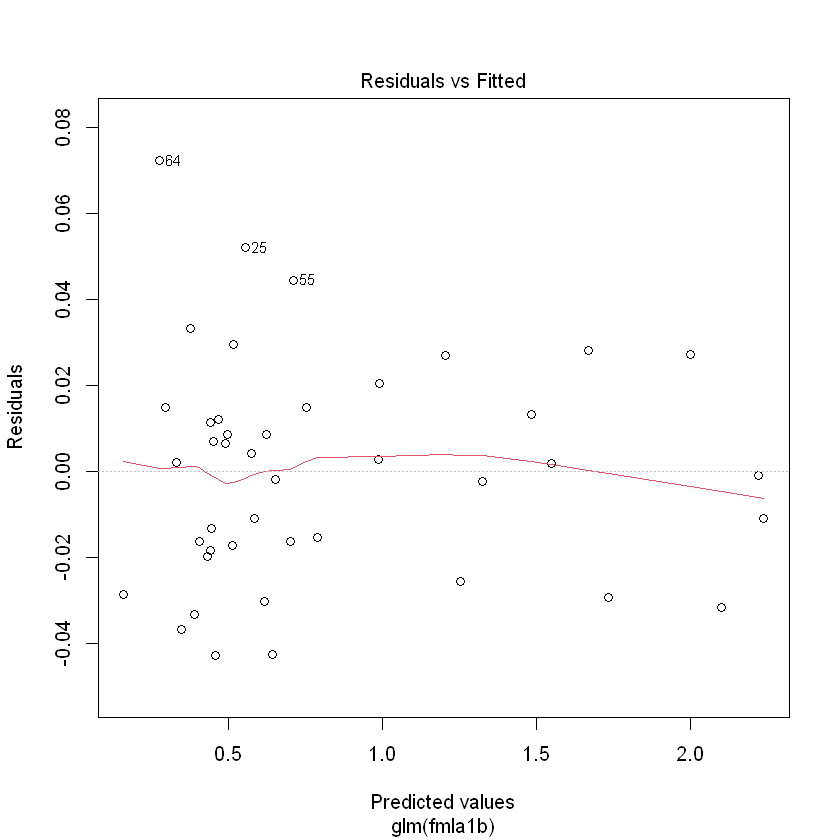

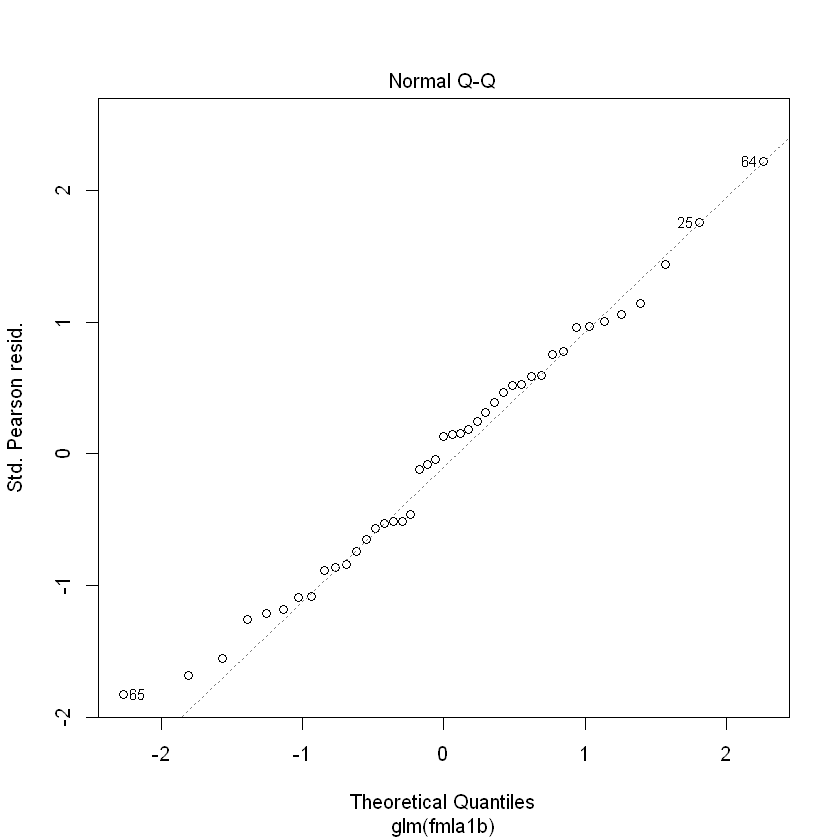

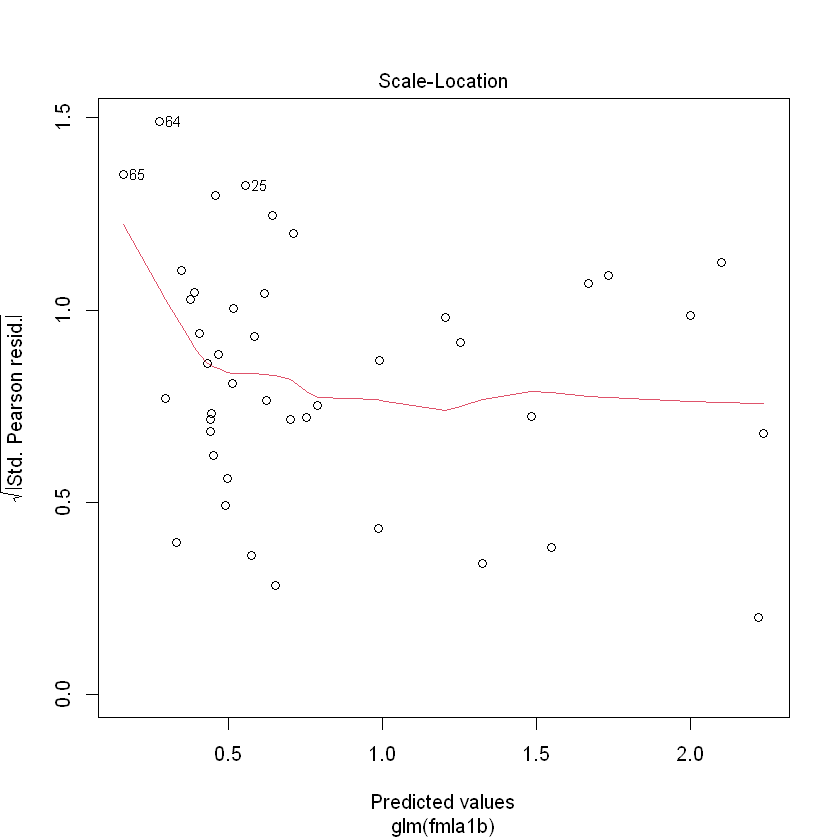

[1] 0.002

  deviance df theta (Shape or Dispersion for NegBinom) AIC logLik estVar
1    0.028 15                                       NA  NA     NA     NA
  chkDispersion
1         0.002


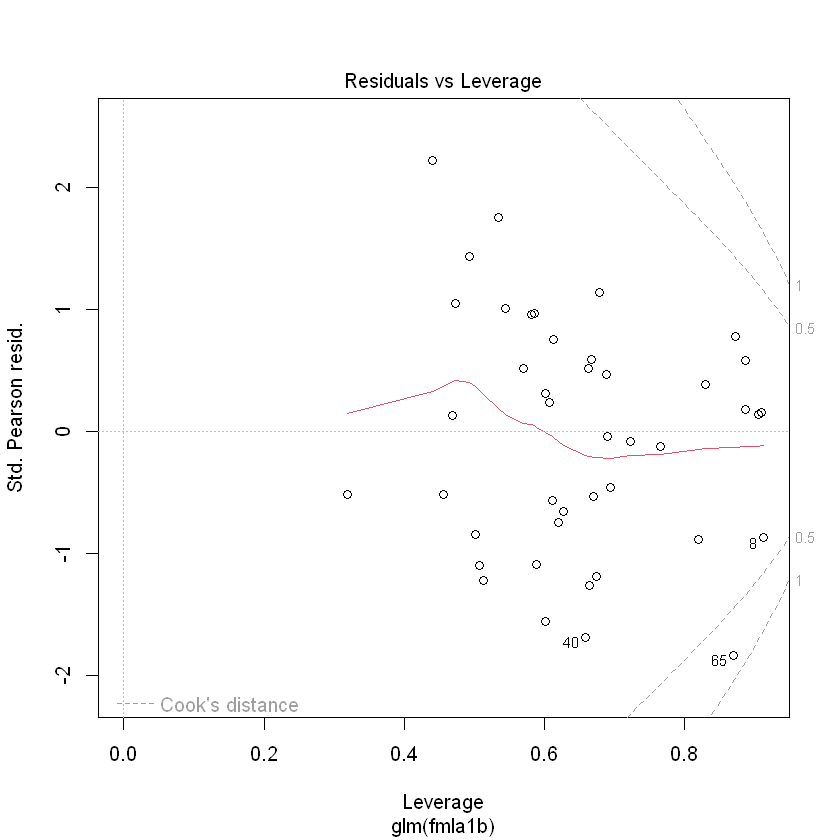

In [34]:
m1.qbin.def <- glm(fmla1b,
           family=quasibinomial(), # weights=wtOffsetVec,
           data=dat)
  # > Warning message ... "non-integer #successes in a binomial glm!"
  # refer https://stackoverflow.com/questions/12953045/warning-non-integer-successes-in-a-binomial-glm-survey-packages.
myGOFglm(m1.qbin.def)
m1.qbin.def.stat <- myGOFglm.stat(m1.qbin.def); print(m1.qbin.def.stat)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)          2.1711e+00  1.6961e-01 12.8004 < 2.2e-16 ***
year2022            -3.4425e-02  1.6462e-02 -2.0912 0.0365096 *  
UGactualStudents     5.1369e-05  1.0397e-05  4.9408 7.780e-07 ***
PGactualStudents     5.0236e-05  3.7667e-05  1.3337 0.1823104    
PhDpursuing          4.6639e-05  5.4006e-05  0.8636 0.3878091    
FROsalaries         -8.4079e-04  2.5625e-04 -3.2811 0.0010341 ** 
FROmtce             -9.0349e-04  1.8557e-04 -4.8687 1.123e-06 ***
FROseminars          2.7360e-03  3.4309e-03  0.7975 0.4251892    
SRprojects           5.6619e-05  1.5057e-04  0.3760 0.7068926    
SRagencies          -1.5205e-03  7.7838e-04 -1.9535 0.0507647 .  
SRamount             2.6725e-03  8.7644e-04  3.0493 0.0022938 ** 
Cprojects           -2.6376e-04  8.6859e-05 -3.0366 0.0023925 ** 

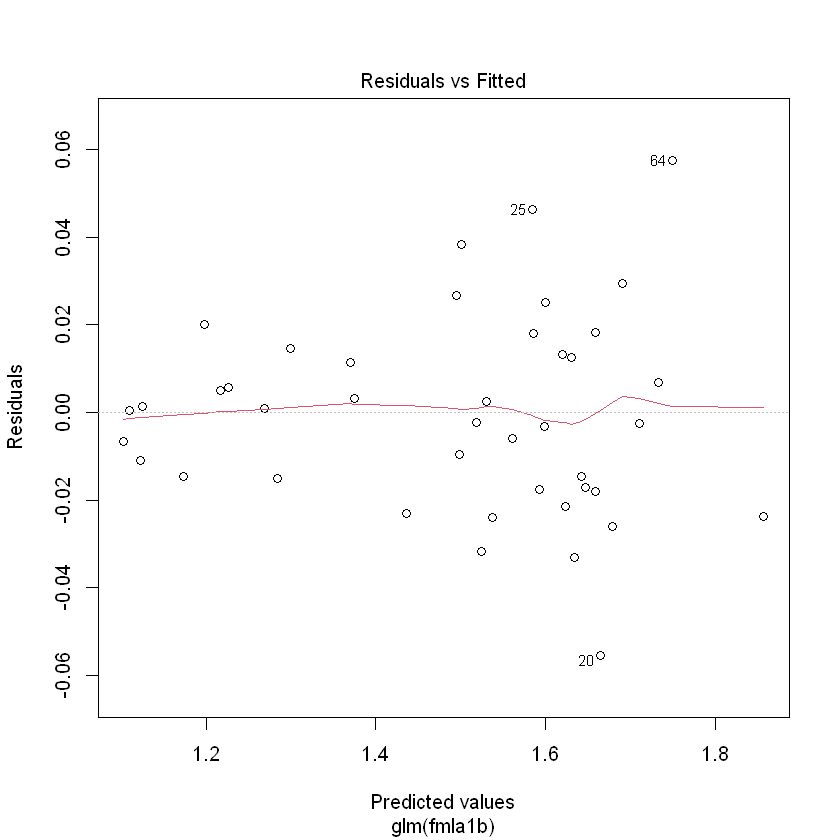

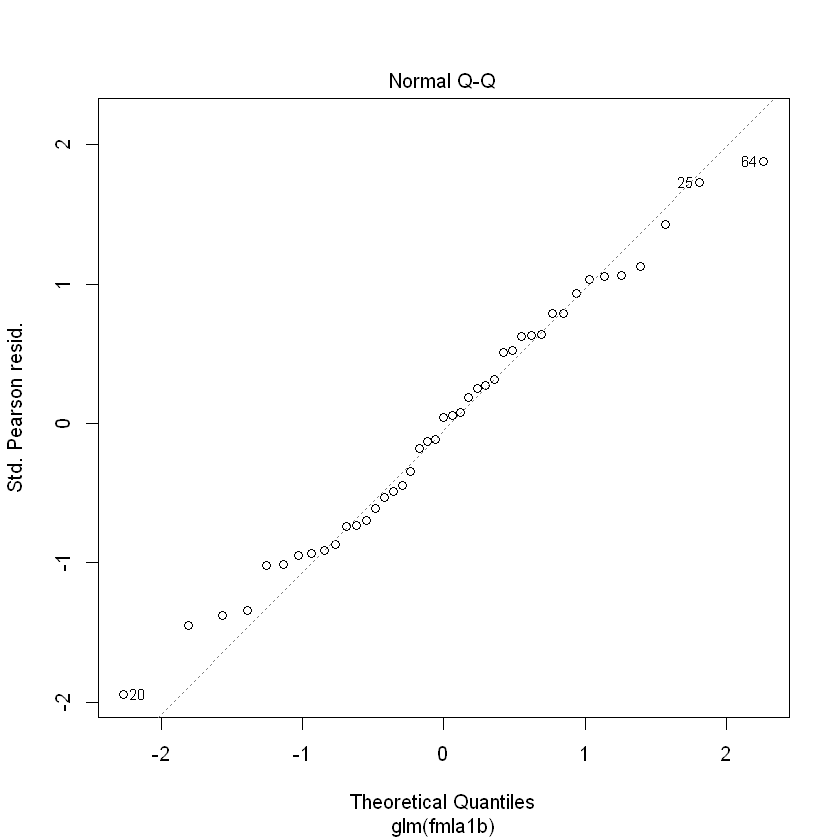

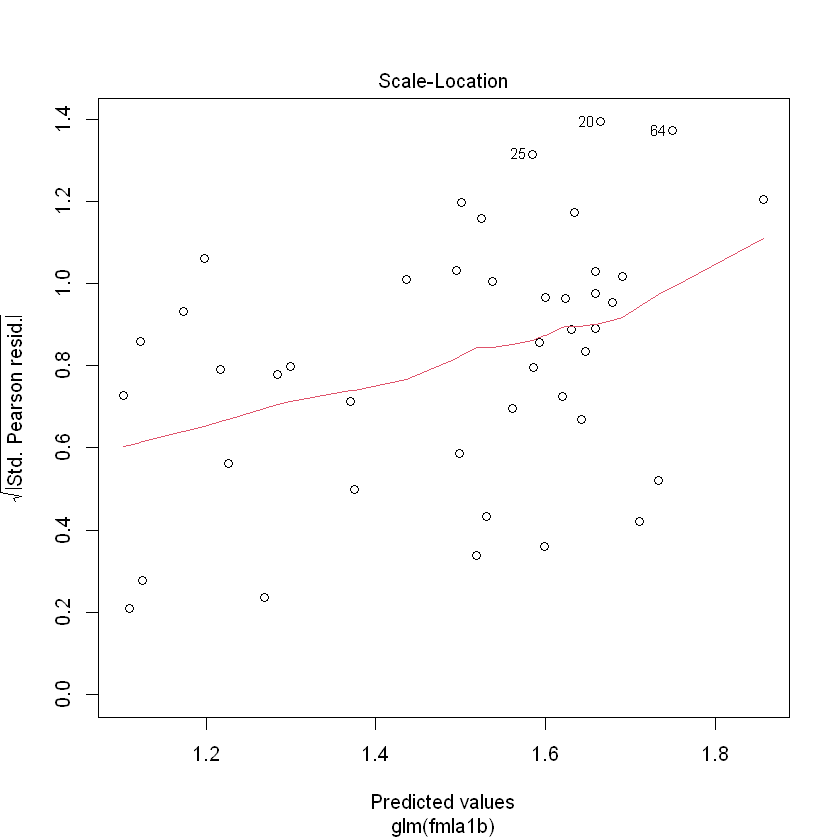

[1] 0.001

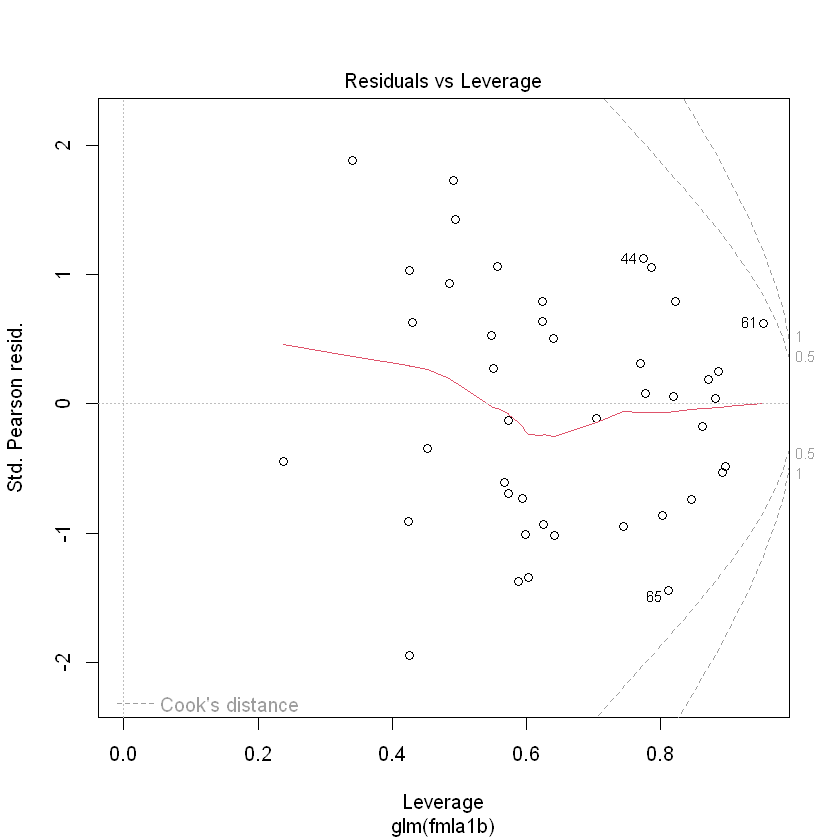

In [35]:
# Skipped Poisson regression.
m1.gam.inv.def <- glm(fmla1b,
           family=Gamma(link="inverse"), # weights=wtOffsetVec,
           data=dat); myGOFglm(m1.gam.inv.def)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)          3.4758e-01  7.0326e-02  4.9424 7.715e-07 ***
year2022             1.7195e-02  7.0085e-03  2.4534 0.0141493 *  
UGactualStudents    -1.9962e-05  4.0960e-06 -4.8735 1.096e-06 ***
PGactualStudents    -2.9936e-05  1.6804e-05 -1.7815 0.0748269 .  
PhDpursuing         -2.0983e-05  2.1694e-05 -0.9672 0.3334303    
FROsalaries          3.8988e-04  1.6817e-04  2.3184 0.0204277 *  
FROmtce              4.3446e-04  9.1930e-05  4.7260 2.290e-06 ***
FROseminars         -1.9437e-03  2.3006e-03 -0.8449 0.3981906    
SRprojects          -5.1468e-05  7.3074e-05 -0.7043 0.4812344    
SRagencies           6.9777e-04  3.1544e-04  2.2121 0.0269610 *  
SRamount            -8.4888e-04  3.2200e-04 -2.6362 0.0083830 ** 
Cprojects            1.1103e-04  3.7038e-05  2.9978 0.0027191 ** 

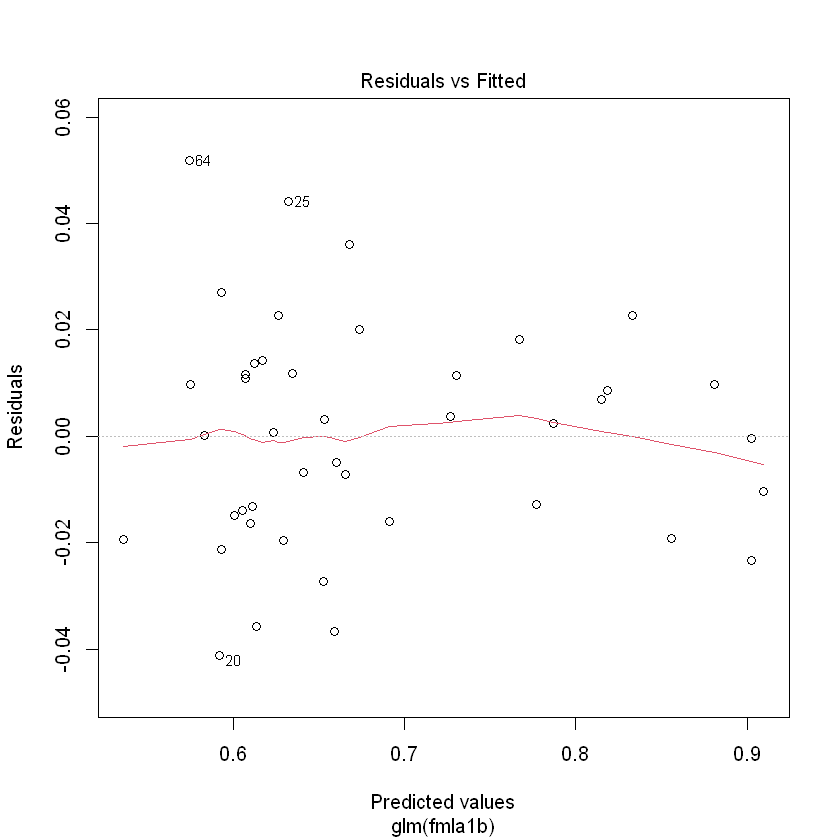

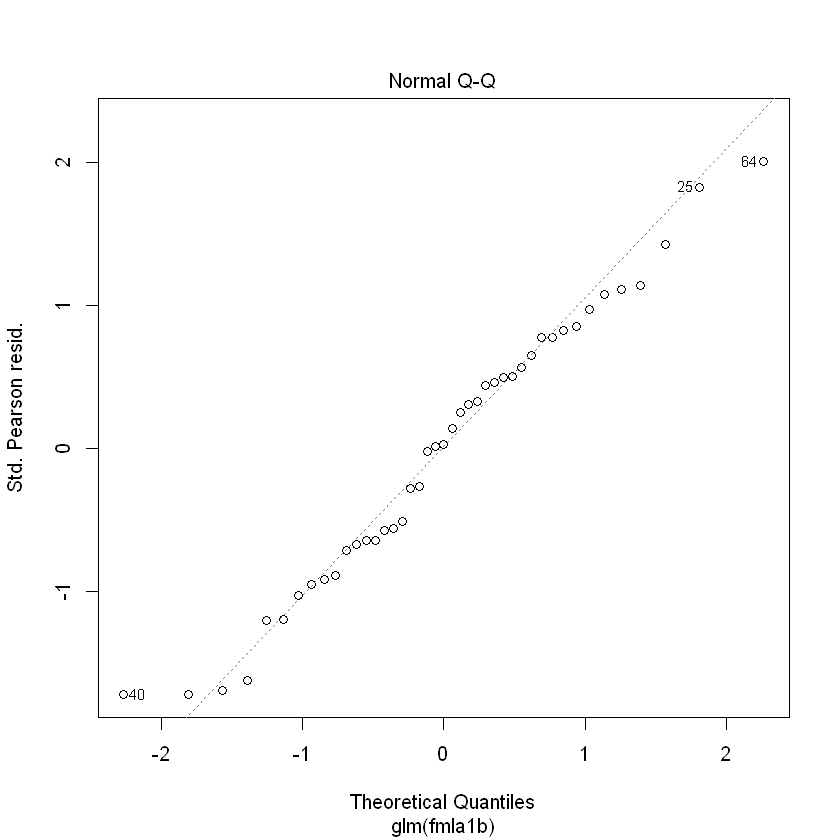

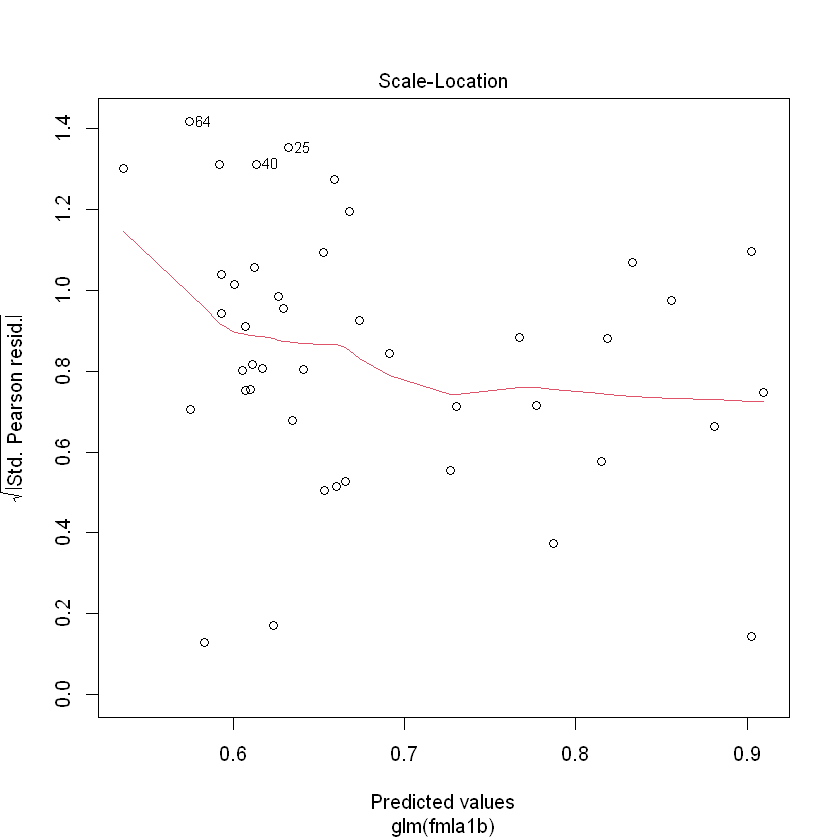

[1] 0.001

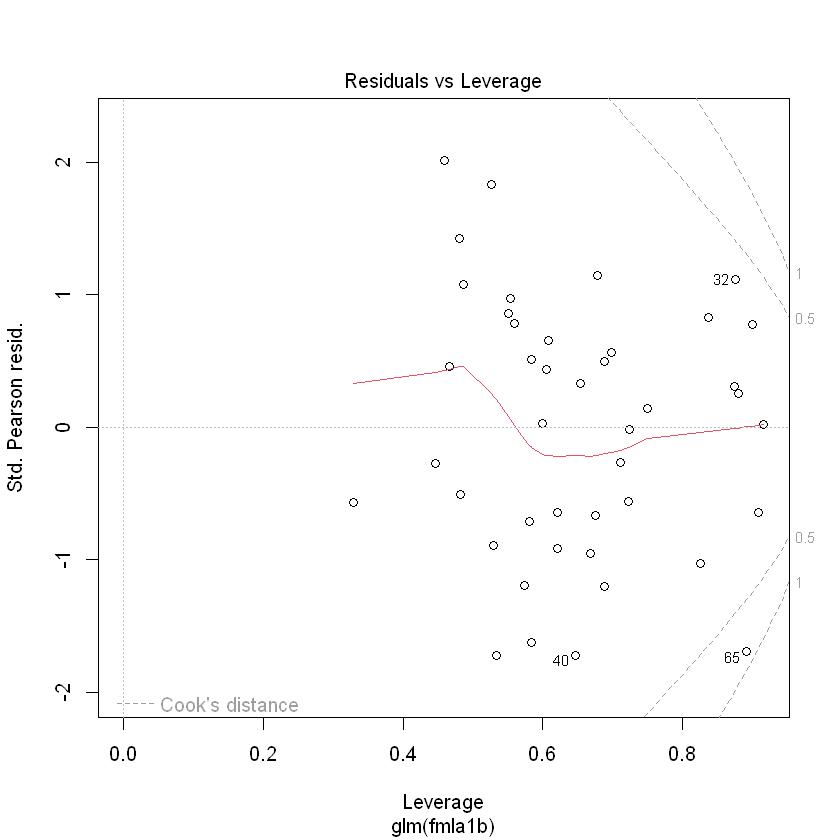

In [36]:
m1.gam.id <- glm(fmla1b,
           family=Gamma(link="identity"), # weights=wtOffsetVec,
            data=dat); myGOFglm(m1.gam.id)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)         -8.6508e-01  1.0794e-01 -8.0145 1.106e-15 ***
year2022             2.4064e-02  1.0886e-02  2.2105 0.0270683 *  
UGactualStudents    -3.1972e-05  6.5120e-06 -4.9097 9.122e-07 ***
PGactualStudents    -3.9745e-05  2.5132e-05 -1.5814 0.1137769    
PhDpursuing         -3.1755e-05  3.4353e-05 -0.9244 0.3552919    
FROsalaries          5.9176e-04  2.0336e-04  2.9099 0.0036158 ** 
FROmtce              6.1692e-04  1.2857e-04  4.7982 1.601e-06 ***
FROseminars         -2.4202e-03  2.7551e-03 -0.8785 0.3796906    
SRprojects          -5.3308e-05  1.0426e-04 -0.5113 0.6091474    
SRagencies           1.0094e-03  5.0010e-04  2.0183 0.0435562 *  
SRamount            -1.5595e-03  5.3495e-04 -2.9153 0.0035531 ** 
Cprojects            1.7097e-04  5.6675e-05  3.0167 0.0025558 ** 

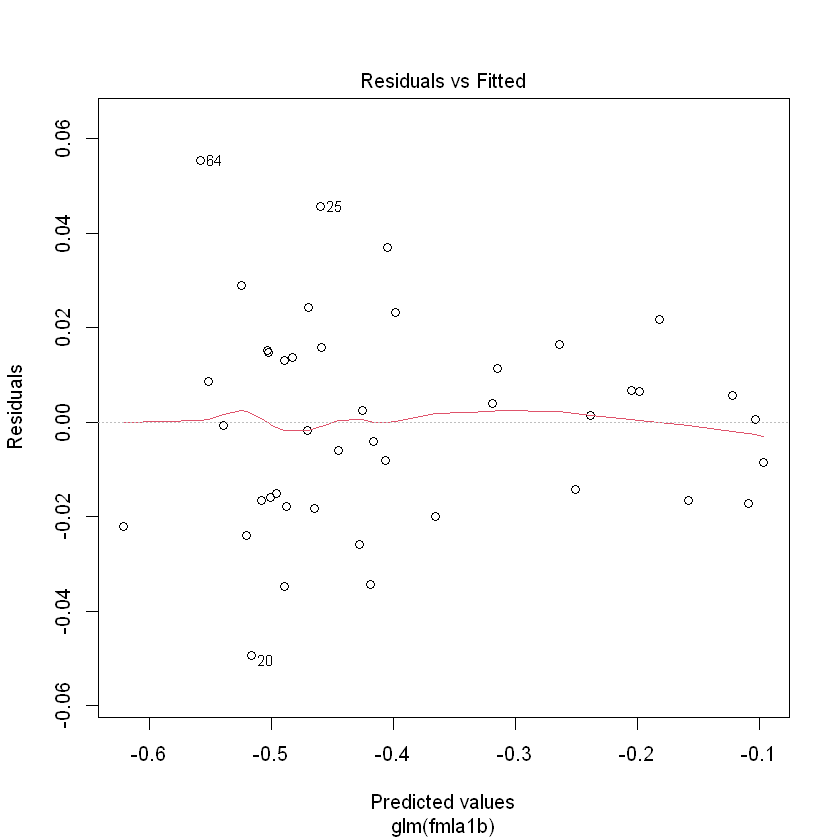

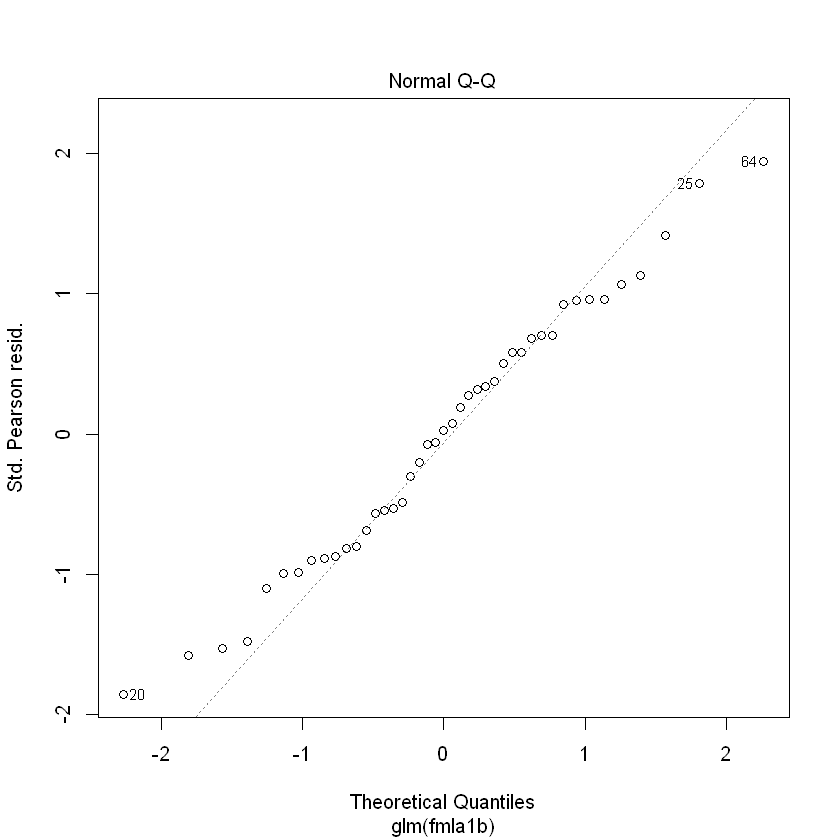

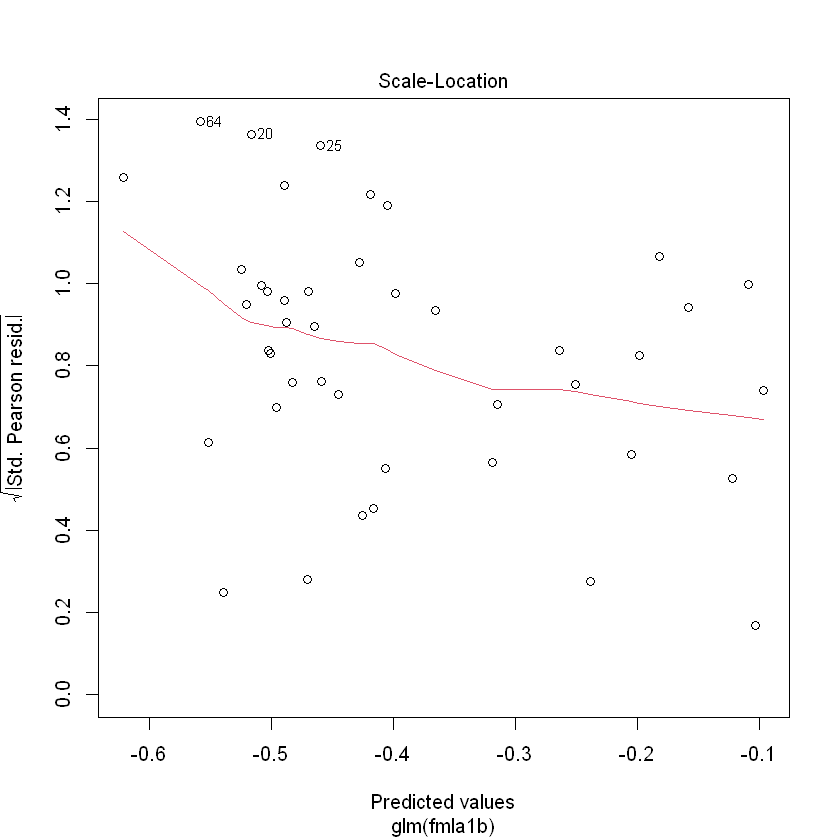

[1] 0.001

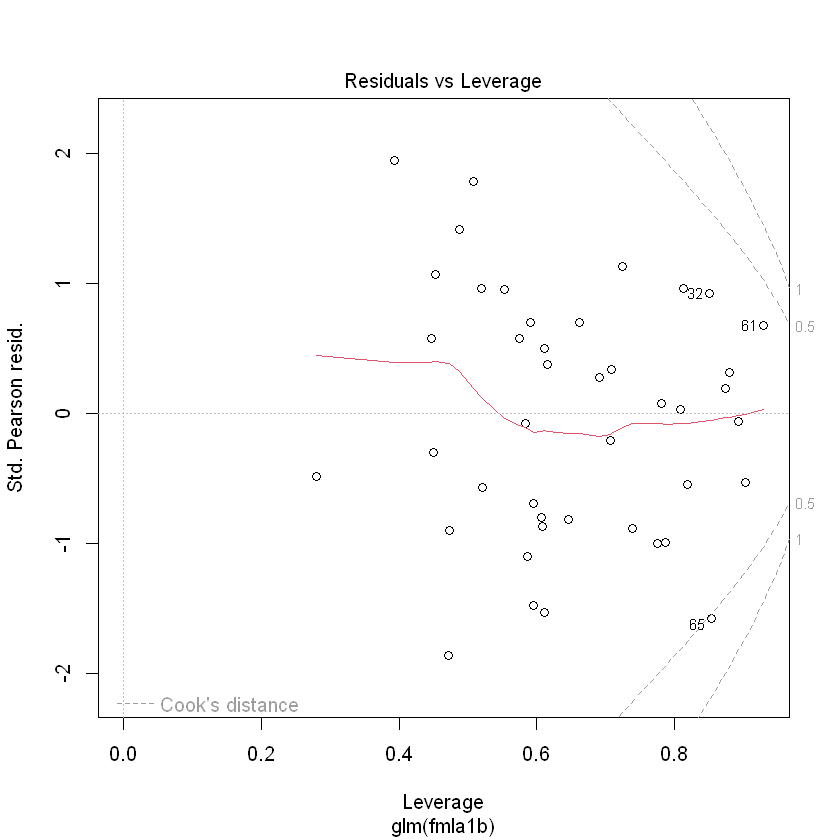

In [37]:
m1.gam.log <- glm(fmla1b,
           family=Gamma(link="log"), # weights=wtOffsetVec,
            data=dat); myGOFglm(m1.gam.log)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)          4.2759e+00  5.4665e-01  7.8219 5.201e-15 ***
year2022            -1.1062e-01  5.2056e-02 -2.1250 0.0335840 *  
UGactualStudents     1.6591e-04  3.3718e-05  4.9203 8.640e-07 ***
PGactualStudents     1.1785e-04  1.1955e-04  0.9858 0.3242495    
PhDpursuing          1.4578e-04  1.7329e-04  0.8412 0.4002138    
FROsalaries         -2.2716e-03  7.5491e-04 -3.0091 0.0026201 ** 
FROmtce             -2.7664e-03  5.8495e-04 -4.7293 2.253e-06 ***
FROseminars          5.2611e-03  1.0282e-02  0.5117 0.6088780    
SRprojects           1.2412e-04  4.6895e-04  0.2647 0.7912513    
SRagencies          -4.7130e-03  2.5003e-03 -1.8850 0.0594305 .  
SRamount             8.7108e-03  2.8681e-03  3.0372 0.0023882 ** 
Cprojects           -8.2502e-04  2.7615e-04 -2.9876 0.0028121 ** 

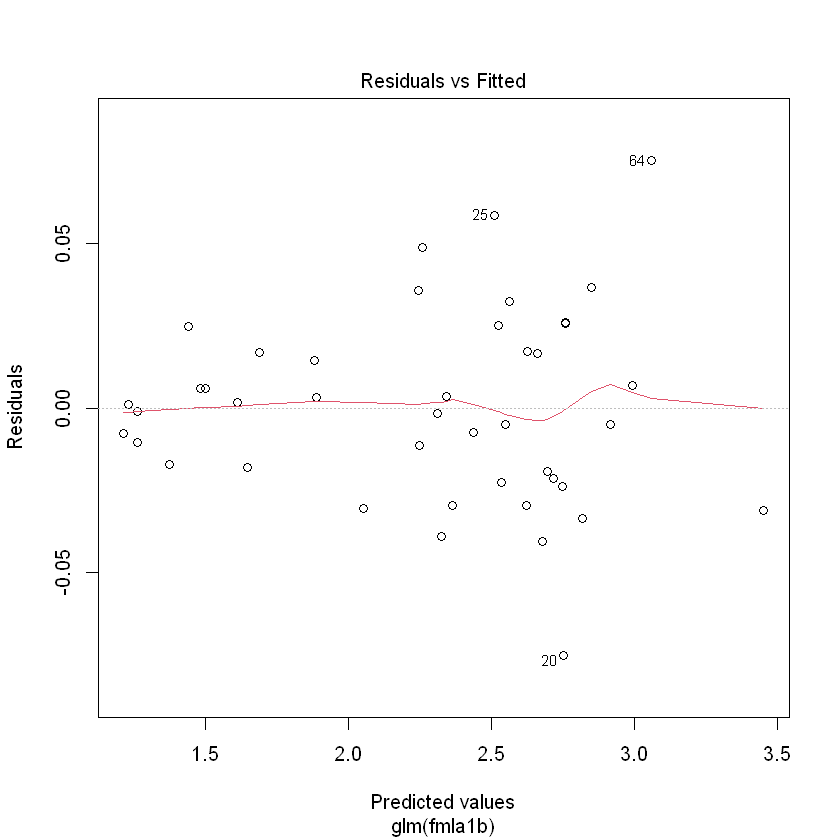

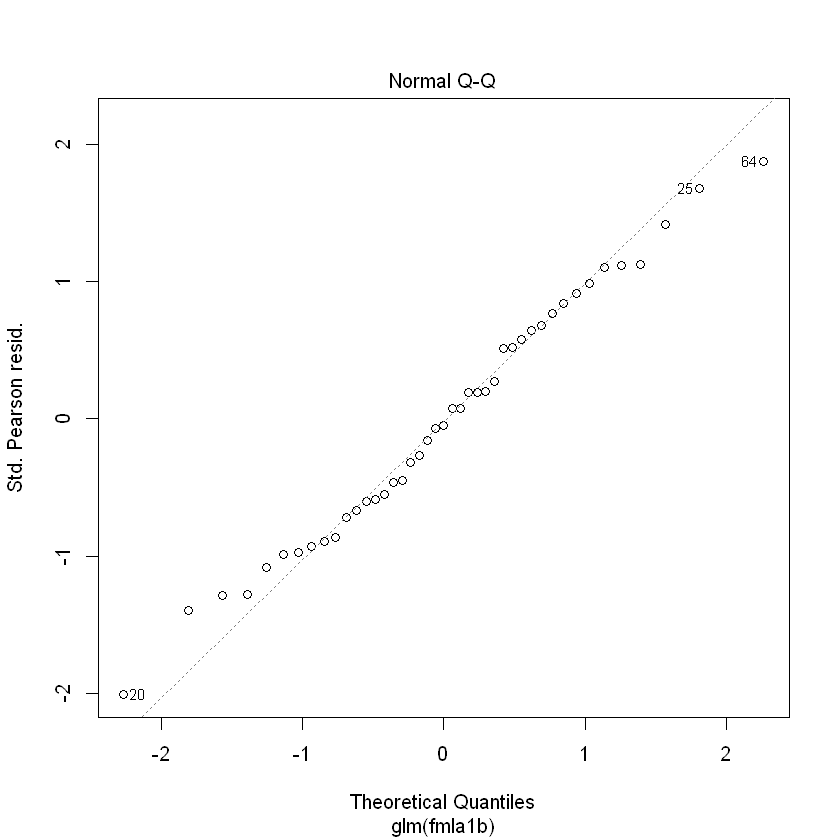

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


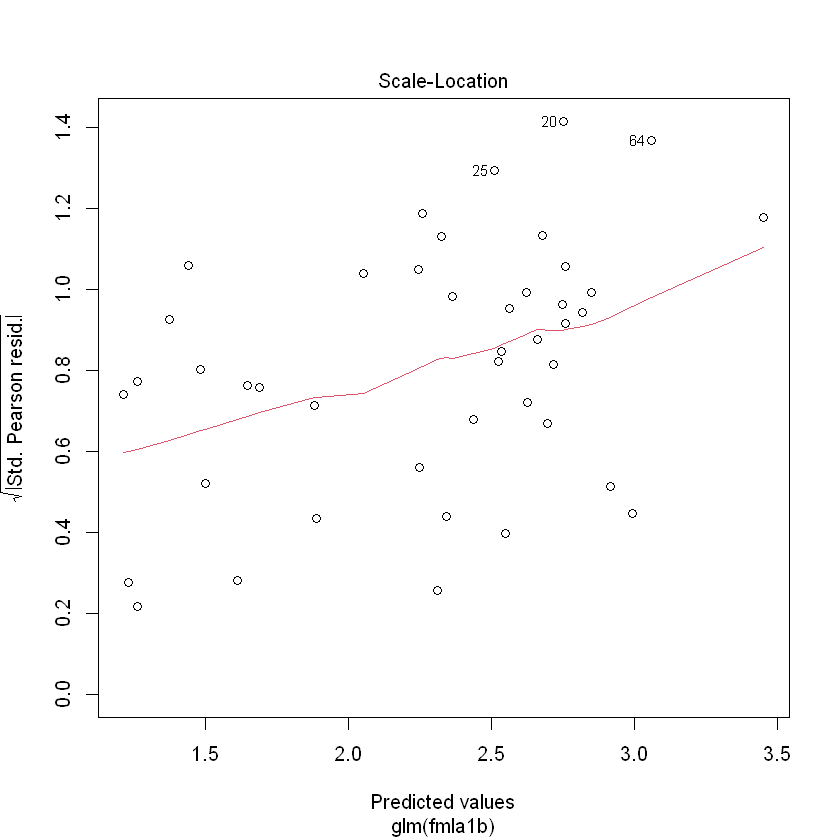

[1] 0.002

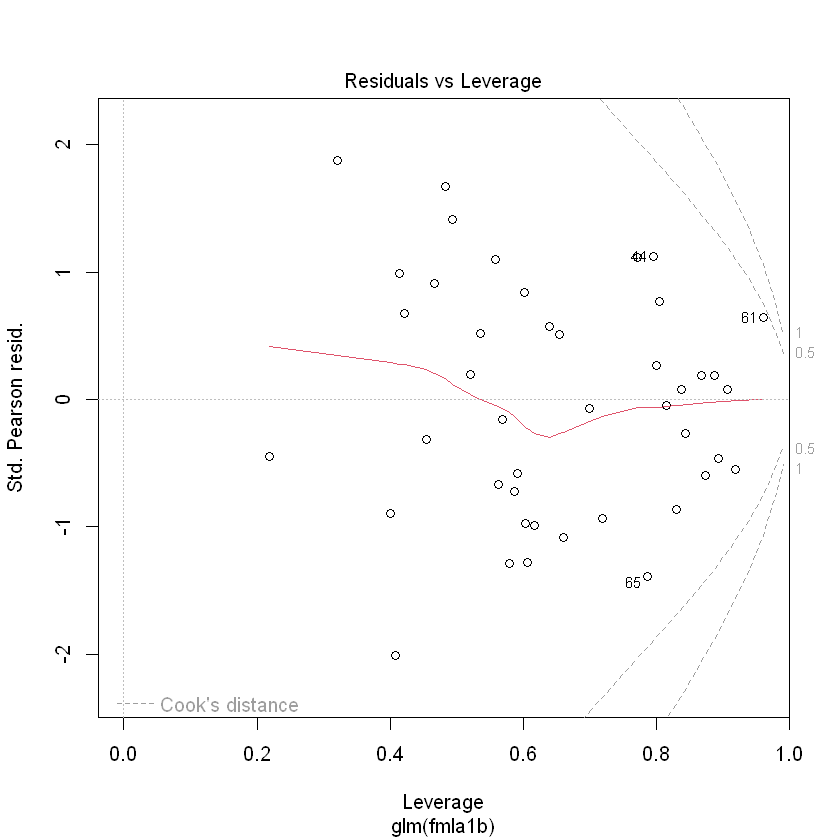

In [38]:
m1.invgau.invmu2.def <- glm(fmla1b,
           family=inverse.gaussian(), # link="1/mu^2" by default, weights=wtOffsetVec,
           data=dat); myGOFglm(m1.invgau.invmu2.def)

[1] "Inference with this robust sandwich covar-matrix estimator while using Poisson means (and underestimated var)."

z test of coefficients:

                       Estimate  Std. Error z value  Pr(>|z|)    
(Intercept)          3.4089e-01  7.2655e-02  4.6919 2.707e-06 ***
year2022             1.9255e-02  7.2398e-03  2.6596 0.0078237 ** 
UGactualStudents    -2.0160e-05  4.1340e-06 -4.8765 1.080e-06 ***
PGactualStudents    -3.0577e-05  1.7422e-05 -1.7551 0.0792502 .  
PhDpursuing         -2.0270e-05  2.1940e-05 -0.9239 0.3555551    
FROsalaries          3.3822e-04  1.8848e-04  1.7944 0.0727437 .  
FROmtce              4.6375e-04  9.9180e-05  4.6759 2.927e-06 ***
FROseminars         -1.8441e-03  2.6260e-03 -0.7023 0.4825150    
SRprojects          -5.9504e-05  7.8237e-05 -0.7606 0.4469179    
SRagencies           7.3178e-04  3.2661e-04  2.2406 0.0250543 *  
SRamount            -8.0170e-04  3.2441e-04 -2.4713 0.0134641 *  
Cprojects            1.1230e-04  3.8274e-05  2.9341 0.0033450 ** 

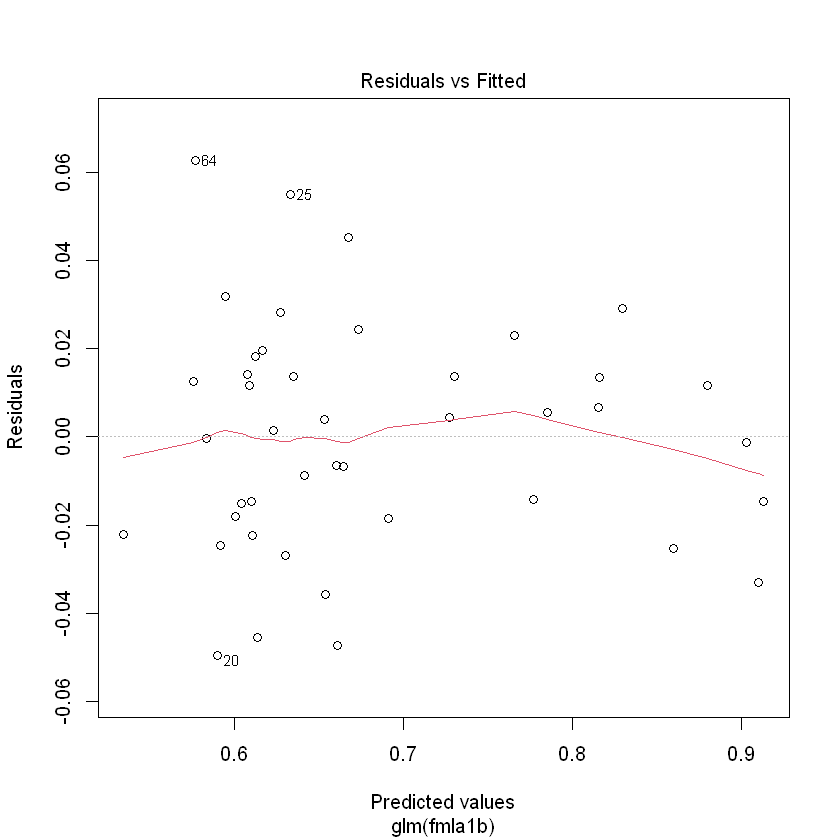

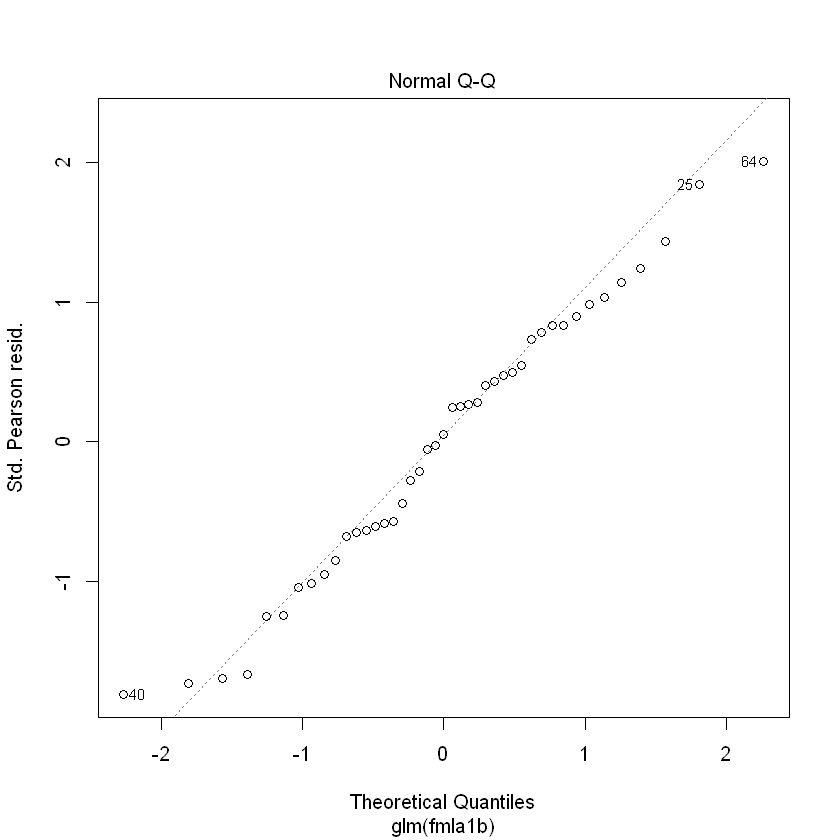

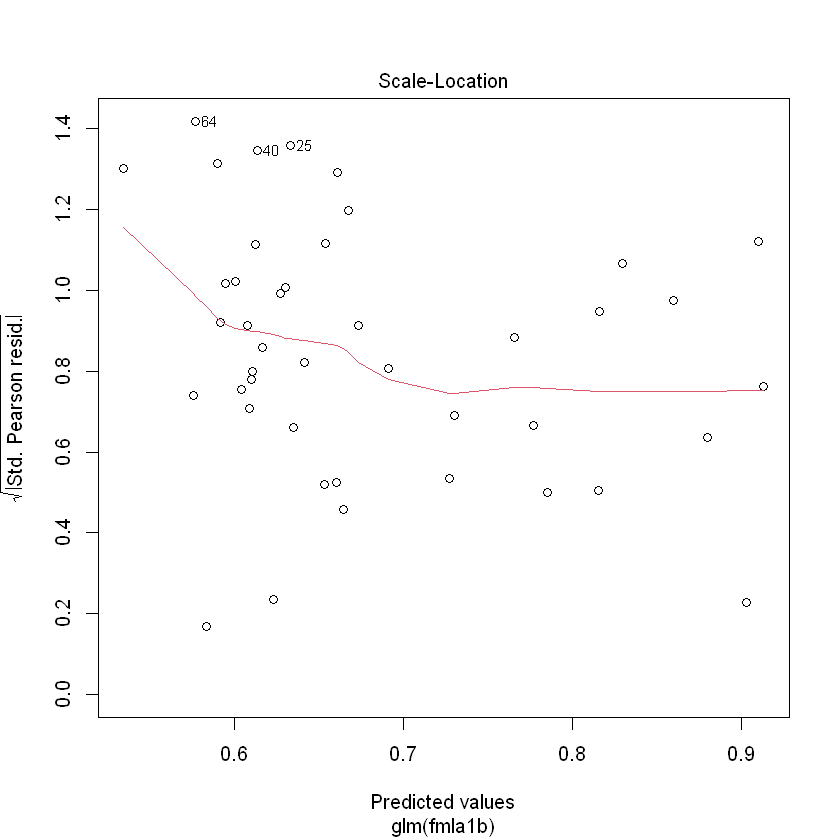

[1] 0.002

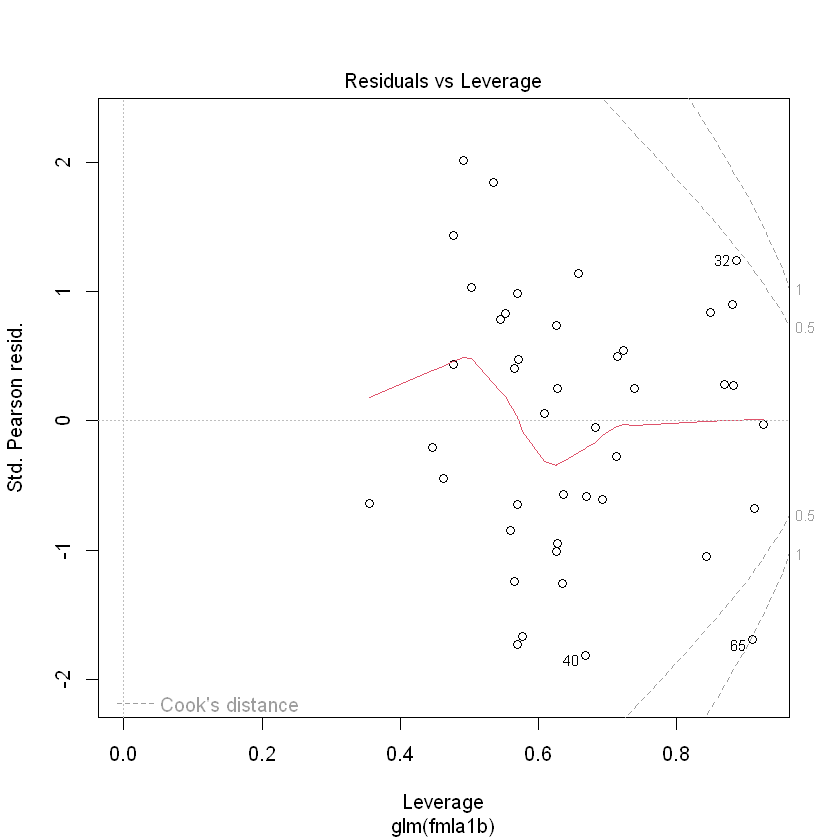

In [39]:
m1.invgau.id <- glm(fmla1b,
           family=inverse.gaussian(link="identity"), # weights=wtOffsetVec,
           data=dat); myGOFglm(m1.invgau.id)

In [40]:
# Excluding "faculty" data:
# m1 .7549RD.0501 AIC244 okRvsQ, m1.signif .75RD.05 AC-257,
# m1b 3.8RD.19 AIC92 okRvsQ, m1gi 1.5RD.14 AIC226 flatRvsL,
# m1gl 1.5RD.12 AIC235 nokRvsL, m1igi 2.2RD.17 AIC240 cutRvsL.

In [41]:
sessionInfo()

R version 4.2.0 (2022-04-22 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 8.1 x64 (build 9600)

Matrix products: default

locale:
[1] LC_COLLATE=English_India.1252  LC_CTYPE=English_India.1252   
[3] LC_MONETARY=English_India.1252 LC_NUMERIC=C                  
[5] LC_TIME=English_India.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sandwich_3.0-2 lmtest_0.9-40  zoo_1.8-10     pscl_1.5.5     dplyr_1.0.8   

loaded via a namespace (and not attached):
 [1] magrittr_2.0.3   MASS_7.3-56      tidyselect_1.1.2 uuid_1.1-0      
 [5] lattice_0.20-45  R6_2.5.1         rlang_1.0.2      fastmap_1.1.0   
 [9] fansi_1.0.3      tools_4.2.0      grid_4.2.0       utf8_1.2.2      
[13] cli_3.3.0        htmltools_0.5.2  digest_0.6.29    tibble_3.1.8    
[17] lifecycle_1.0.1  crayon_1.5.1     IRdisplay_1.1    purrr_0.3.4     
[21] repr_1.1.4       base64enc_0.1-3  vctrs_0.4.1      IRkernel_

In [42]:
tapply(dat$SRCrevPerFaculty, dat$year, summary)

$`2021`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.004865 0.084205 0.131648 0.193538 0.236488 0.874128        1 

$`2020`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     NA      NA      NA     NaN      NA      NA      22 

$`2022`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005205 0.070281 0.157599 0.208580 0.264974 0.894496 


In [43]:
tapply(dat$Score, dat$year, summary)

$`2021`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.58   59.31   63.88   67.99   77.02   90.19 

$`2020`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.17   59.24   62.30   67.18   75.94   89.93 

$`2022`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  59.16   61.48   65.61   69.19   75.77   90.04 


In [44]:
summary(dat$SRCrevPerFaculty)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.004865 0.073149 0.142279 0.201234 0.242408 0.894496       23 

In [45]:
summary(dat$works_count2022)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1354    2441    4432    4919    6495    9420 

In [46]:
### --- Attempt PCR or PLSR (Principal Components Regression or Partial Least Squares Regression):
# refer http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-r.html
mustInstall <- FALSE; if(mustInstall){
    install.packages(c("ISLR", "pls"))
} # else continue.
library(ISLR)
library(dplyr)
library(tidyr)
library(pls)

Warning message:
"package 'ISLR' was built under R version 4.2.1"
Warning message:
"package 'pls' was built under R version 4.2.1"

Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




In [47]:
Hitters.yad <- dat[, c(varNames.resp,
                       setdiff(varNames.explan, c("year", "category",
                                                 c() # c("faculty", "SRCrevPerFaculty", "works2022perFaculty")
                                                 )))]
  # coz some variables are categorical (not continuous) or cause observations to drop due to `faculty` dependence.
Hitters.yad <- na.omit(Hitters.yad)
# colnames(Hitters.yad)[1] # <- "Score"
# Hitters.yad$pScore <- 100 * Hitters.yad$pScore
colnames(Hitters.yad)
fmla <- as.formula(paste(varNames.resp,
                      paste(setdiff(colnames(Hitters.yad), varNames.resp), collapse="+"),
                      sep="~"))
  # was update(fmla1b, . ~ . - year - category - faculty - SRCrevPerFaculty - works2022perFaculty)

[1] "pScore"              "UGactualStudents"    "PGactualStudents"   
 [4] "PhDpursuing"         "FROsalaries"         "FROmtce"            
 [7] "FROseminars"         "SRprojects"          "SRagencies"         
[10] "SRamount"            "Cprojects"           "Corgs"              
[13] "Camount"             "faculty"             "UGPGPhD"            
[16] "propPGPhD"           "propPhD"             "FROcost"            
[19] "SRCrevenue"          "SRCrevPerFaculty"    "works_count2021"    
[22] "TC2021"              "works_count2022"     "TC2022"             
[25] "TCperWork2021"       "TCperWork2022"       "works2022perFaculty"

In [48]:
set.seed(1)
train = Hitters.yad %>%
  sample_frac(0.7)

test = Hitters.yad %>%
  setdiff(train)

In [49]:
x_train = model.matrix(fmla, train)[,-1]
x_test = model.matrix(fmla, test)[,-1]
# x_train = model.matrix(Salary~., train)[,-1]
# x_test = model.matrix(Salary~., test)[,-1]

y_train = train %>%
  select(pScore) %>%
  # select(Salary) %>%
  unlist() %>%
  as.numeric()

y_test = test %>%
  select(pScore) %>%
  # select(Salary) %>%
  unlist() %>%
  as.numeric()

In [50]:
glimpse(y_train); glimpse(y_test)

 num [1:30] 0.781 0.881 0.73 0.902 0.614 ...
 num [1:13] 0.603 0.635 0.6 0.626 0.66 ...


Data: 	X dimension: 30 26 
	Y dimension: 30 1
Fit method: kernelpls
Number of components considered: 26

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.1128  0.04804  0.04056  0.03820  0.04259  0.04669  0.05180
adjCV       0.1128  0.04704  0.03970  0.03739  0.04137  0.04515  0.04978
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV     0.04713  0.04821  0.04726   0.04370   0.03766   0.03706   0.03691
adjCV  0.04544  0.04648  0.04534   0.04194   0.03627   0.03561   0.03527
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV      0.03702   0.03537   0.03326   0.03446   0.03758   0.04159   0.04702
adjCV   0.03544   0.03380   0.03183   0.03301   0.03596   0.03970   0.04483
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps
CV      0.05015   0.09724   0.09731   0.09734   0.09734   0.09734
adjCV   0.04778   0.09237   0.09244  

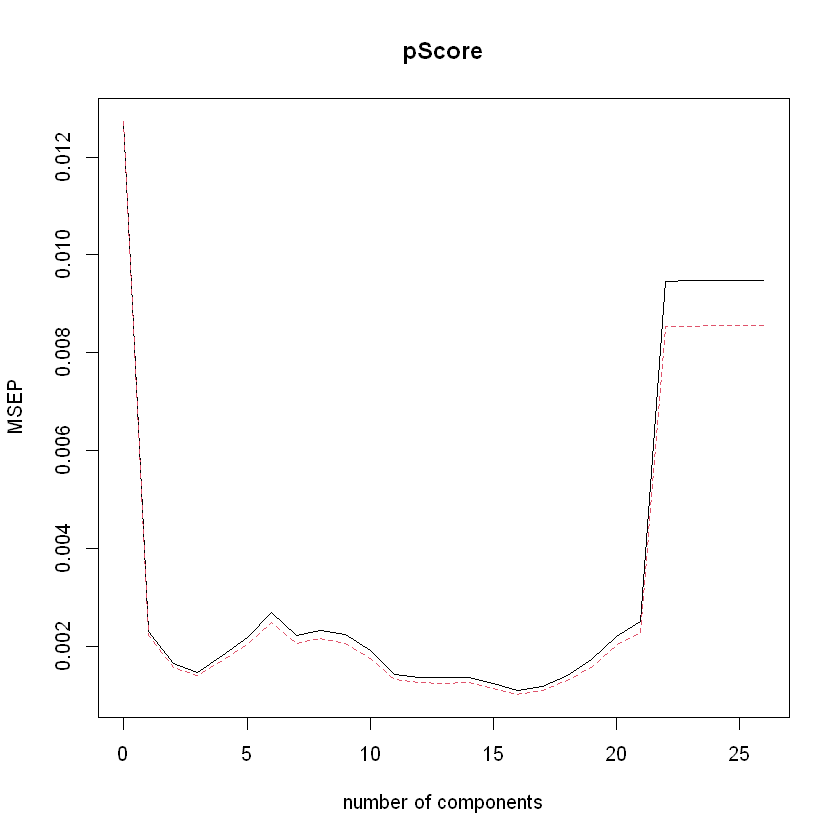

In [51]:
# c.ncomp <- 5
pls_fit = plsr(fmla, # ncomp=c.ncomp, # Salary~.,
  data = train, scale = TRUE, validation = "CV")
summary(pls_fit)
validationplot(pls_fit, val.type = "MSEP")

In [52]:
ncomp.choice.pls <- c(2:7)[5-1]

In [53]:
pls_pred = predict(pls_fit, x_test, ncomp = ncomp.choice.pls) # 2)
mean((pls_pred - y_test)^2)

[1] 0.001514931

In [54]:
pls_fit2 = plsr(fmla, # Salary~.,
  data = Hitters.yad, scale = TRUE, ncomp = ncomp.choice.pls) # 2)
summary(pls_fit2)

Data: 	X dimension: 43 26 
	Y dimension: 43 1
Fit method: kernelpls
Number of components considered: 5
TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps
X         44.06    58.64    70.10    76.12    83.41
pScore    86.21    90.01    91.95    93.18    93.88


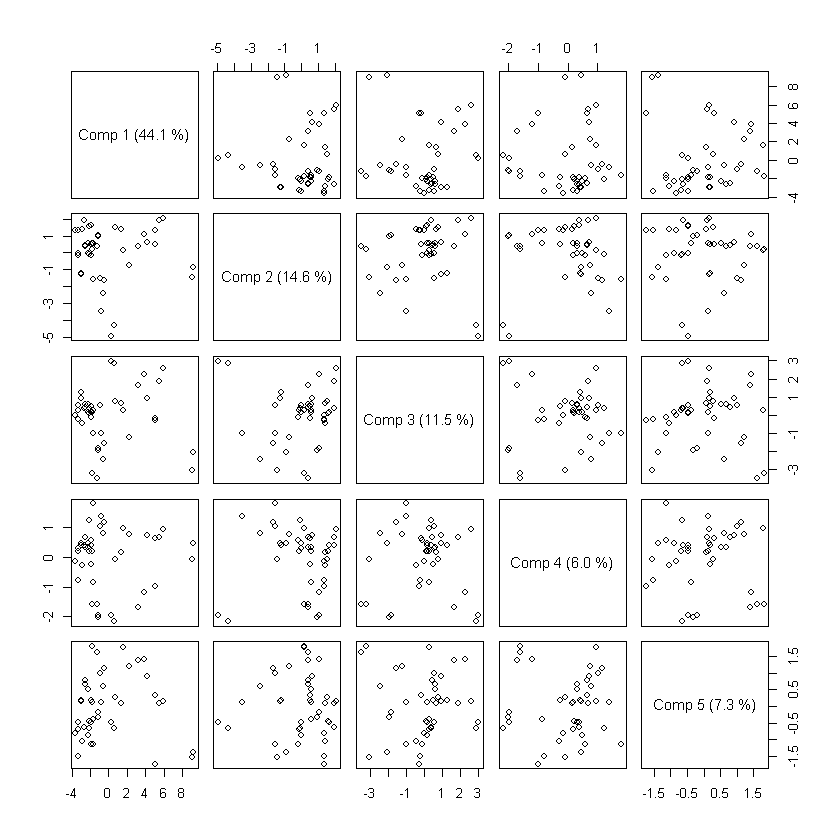

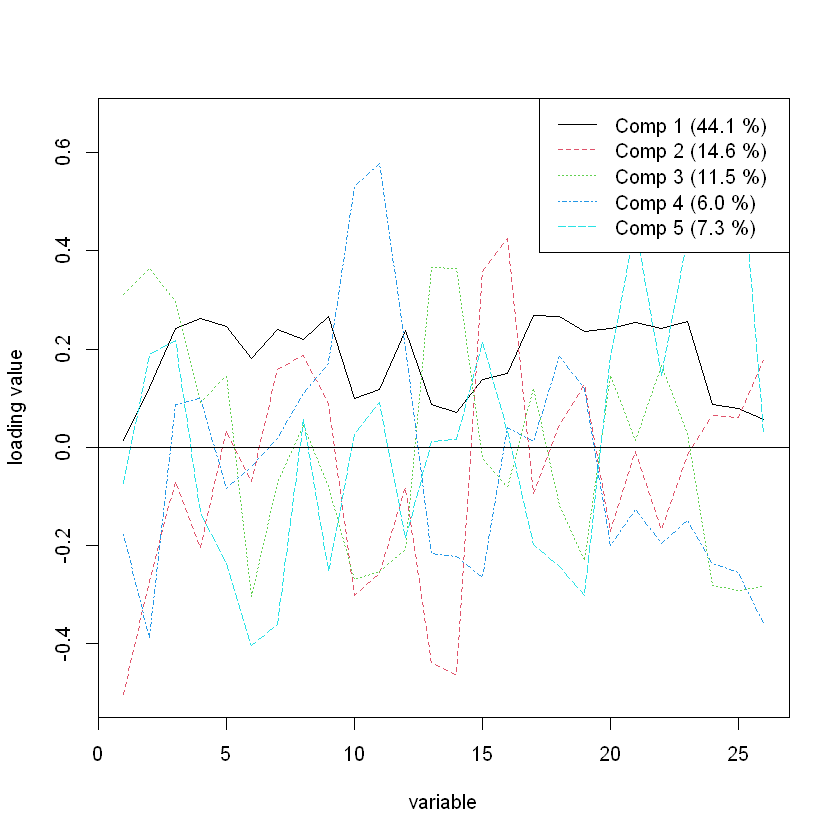

In [55]:
# Refer https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf:
# [Put the other way around: with the
# same number of latent variables, PLSR will cover more of the variation in Y and PCR will
# cover more of X. In turn, both behave very similar to ridge regression.
# It can also be shown that both PCR and PLSR behave as shrinkage methods ...].
plot(pls_fit2, plottype = "scores", comps = 1:ncomp.choice.pls)
  # [for patterns, groups or outliers]
plot(pls_fit2, "loadings", comps = 1:ncomp.choice.pls,
  legendpos = "topright" # presumes 2 <= ncomp.choice.pls
  # , labels = "numbers"
  # [much used for interpretation purposes]
); abline(h=0)

In [56]:
head(round(pls_fit2$coefficients, 4), 2)
pls_fit2$loadings
pls_fit2$loading.weights # from TY to X comp ... in PLSR, not PCR.
pls_fit2$projection
# compnames(pls_fit2, ncomp=ncomp.choice.pls, explvar=TRUE)

, , 1 comps

                 pScore
UGactualStudents -7e-04
PGactualStudents  3e-03

, , 2 comps

                  pScore
UGactualStudents -0.0054
PGactualStudents  0.0012

, , 3 comps

                  pScore
UGactualStudents -0.0059
PGactualStudents  0.0018

, , 4 comps

                  pScore
UGactualStudents -0.0086
PGactualStudents -0.0019

, , 5 comps

                  pScore
UGactualStudents -0.0105
PGactualStudents -0.0037


Loadings:
                    Comp 1 Comp 2 Comp 3 Comp 4 Comp 5
UGactualStudents           -0.504  0.311 -0.178       
PGactualStudents     0.121 -0.272  0.363 -0.387  0.190
PhDpursuing          0.241         0.298         0.217
FROsalaries          0.262 -0.203         0.100 -0.135
FROmtce              0.246         0.146        -0.237
FROseminars          0.182        -0.304        -0.405
SRprojects           0.239  0.158               -0.361
SRagencies           0.221  0.187         0.110       
SRamount             0.266                0.170 -0.252
Cprojects            0.100 -0.303 -0.269  0.531       
Corgs                0.117 -0.257 -0.253  0.579       
Camount              0.237        -0.208  0.203 -0.185
faculty                    -0.438  0.366 -0.217       
UGPGPhD                    -0.463  0.365 -0.222       
propPGPhD            0.138  0.359        -0.266  0.213
propPhD              0.151  0.426                     
FROcost              0.269         0.120        -0.198


Loadings:
                    Comp 1 Comp 2 Comp 3 Comp 4 Comp 5
UGactualStudents           -0.370  0.199 -0.211       
PGactualStudents     0.106 -0.158  0.168 -0.366       
PhDpursuing          0.255  0.140  0.312              
FROsalaries          0.252         0.166  0.140       
FROmtce              0.254               -0.151       
FROseminars          0.151 -0.306 -0.351              
SRprojects           0.241        -0.212 -0.263 -0.399
SRagencies           0.243  0.223               -0.135
SRamount             0.272                      -0.177
Cprojects                  -0.387 -0.126  0.269 -0.374
Corgs                      -0.260         0.467 -0.159
Camount              0.223 -0.143         0.224       
faculty                    -0.261  0.262 -0.195       
UGPGPhD                    -0.307  0.232 -0.249       
propPGPhD            0.158  0.204 -0.229 -0.387 -0.172
propPhD              0.191  0.398                     
FROcost              0.268         0.120              

,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
UGactualStudents,-0.02306843,-0.37253158,-0.052285886,-2.390167e-01,-0.214619951
PGactualStudents,0.10553151,-0.14782709,0.068744211,-3.290345e-01,-0.200608481
PhDpursuing,0.25549412,0.16582955,0.423798768,2.524677e-01,0.091254527
FROsalaries,0.25249277,-0.06589825,0.121896808,2.047396e-01,0.200169489
FROmtce,0.25369188,0.10453524,0.136214553,-7.847683e-02,-0.149271414
FROseminars,0.15085406,-0.29113589,-0.546832483,-3.794548e-01,-0.336081532
SRprojects,0.24090426,0.03913474,-0.186107939,-3.618501e-01,-0.653255674
SRagencies,0.24301649,0.24738359,0.219399527,1.320040e-01,-0.042029252
SRamount,0.27150627,0.07912216,-0.002838652,4.442255e-02,-0.145776701
Cprojects,0.06103131,-0.38120116,-0.382783076,6.449222e-02,-0.328770217


In [57]:
# PLSR Comp1/2: SRamount+FROcost+TC2022+...  Comp2/2: -UGactualStudents-UGPGPhD+propPhD-Cprojects
# PLSR C1/5:SRCamount/FROcost C2/5:-UGactualStudents/UGPGPhD-faculty+propPhD-Cprojects
#   C3/5:faculty C4/5:Corgs+Cprojects-PGactualStudents-works2022perFaculty
#   C5/5:TCperWork2021/TCperWork2022-FROseminars-SRprojects

In [58]:
shrinkComVar <- function(comVec, n=3){
    # stopifnot(dim(comVec)[2] == 1) # expect single column dataframe.
    comVec.abs.decreas <- sort(abs(comVec), decreasing=TRUE) # ; glimpse(comVec.abs.decreas)
    thresh <- comVec.abs.decreas[n] # ; glimpse(thresh)
    ans <- names(comVec)[abs(comVec) >= thresh]
    # glimpse(ans) # sign(c(2,-1))
    return(ans)
}
shrinkCompsVariables <- function(ldgs){
    ans <- apply(ldgs, MARGIN=2, FUN=shrinkComVar) # margin=c(1,2) for rows or columns.
    return(ans)
}
# sort(abs(c(-1,3,2.2,-5)), decreasing=TRUE)[3]

In [59]:
pls_fit2.ldgs <- pls_fit2$loadings
pls_fit2.comVar.shrunk <- shrinkCompsVariables(pls_fit2.ldgs); pls_fit2.comVar.shrunk
pls_fit2.ldgs.shrunk <- pls_fit2.ldgs[dimnames(pls_fit2.ldgs)[[1]] %in% pls_fit2.comVar.shrunk,]; round(pls_fit2.ldgs.shrunk, 3)

Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
SRamount,UGactualStudents,PGactualStudents,PGactualStudents,TC2021
FROcost,faculty,faculty,Cprojects,TCperWork2021
SRCrevenue,UGPGPhD,UGPGPhD,Corgs,TCperWork2022


,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
UGactualStudents,0.014,-0.504,0.311,-0.178,-0.074
PGactualStudents,0.121,-0.272,0.363,-0.387,0.190
SRamount,0.266,0.090,-0.081,0.170,-0.252
Cprojects,0.100,-0.303,-0.269,0.531,0.027
Corgs,0.117,-0.257,-0.253,0.579,0.091
faculty,0.087,-0.438,0.366,-0.217,0.011
UGPGPhD,0.070,-0.463,0.365,-0.222,0.016
FROcost,0.269,-0.095,0.120,0.012,-0.198
SRCrevenue,0.267,0.044,-0.119,0.185,-0.242
TC2021,0.254,-0.009,0.013,-0.127,0.453


In [60]:
# PCR Comp1/2: FROcost+TC2022+PhDpursuing+SRamount+...  Comp2/2: +UGactualStudents+UGPGPhD-propPhD+...
# PCR C1/5:FROcost+FROsalaries+SRCrevenue C2/5:-UGactualStudents-UGPGPhD C3/5:TCperWork2022+propPGPhD-FROseminars
#     C4/5:-Cprojects-Corgs C5/5:-works2022perFaculty-works_count2021/works_count2022
#
# For improving `Score` there is incentive for an institution to consider the choice of components:
# fewer components appear to simplify decision making (and action), but more components explain
# greater variance in Y or X or both;
# it might also offer greater intra-component cohesion and lesser inter-component coupling.
# Including global datasets could offer greater insights, e.g., into new pathways to improve.

In [61]:
# selectNcomp(pls_fit2, ncomp=7)
  # [ncomp= maximum number of components to consider when determining the global minimum
  # in the cross-validation curve]

# [PLS = Partial Least Squares or Projection onto Latent Structures).]
# https://doi.org/10.1016/B978-0-12-374413-5.00352-3 (1999):
# [Partial Least-Squares Regression (PLS)
# PLS is similar to PCR, in that regression is done on scores. The difference is that the responses y (Y)
# are used to find scores that have a large covariance between X and y (Y). One advantage of PLS over PCR
# is that the number of required components is reduced. Since PLS is used on scores, these can be used for
# the detection of outliers and groupings, as was explained for PCA. In this way, PLS automatically gives access
# to a number of diagnostic tools for outlier detection (in X and y). PCR and PLS add an important parameter to
# the regression model: the number of components used in the model, A. This is an extra choice to be made.
# Too few components give a bad model and too many components give a model that is sensitive to noise.]

In [62]:
### --- Now attempt PCR:
pcr_fit = pcr(fmla, data = Hitters.yad, scale = TRUE, validation = "CV")

In [63]:
summary(pcr_fit)

Data: 	X dimension: 43 26 
	Y dimension: 43 1
Fit method: svdpc
Number of components considered: 26

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.1056  0.04875  0.04901  0.04715  0.04753  0.04898  0.04514
adjCV       0.1056  0.04833  0.04837  0.04687  0.04668  0.04809  0.04334
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV     0.03813  0.04074  0.04249   0.04358   0.05430   0.06102   0.07076
adjCV  0.03779  0.04030  0.04176   0.04220   0.05218   0.05841   0.06755
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV      0.06899   0.05286   0.04478   0.04543   0.05970   0.05819   0.07893
adjCV   0.06594   0.05063   0.04316   0.04381   0.05709   0.05557   0.07487
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps
CV      0.06373   0.07150   0.07372   0.07755   0.07848   0.07744
adjCV   0.06061   0.06784   0.06993   0.0

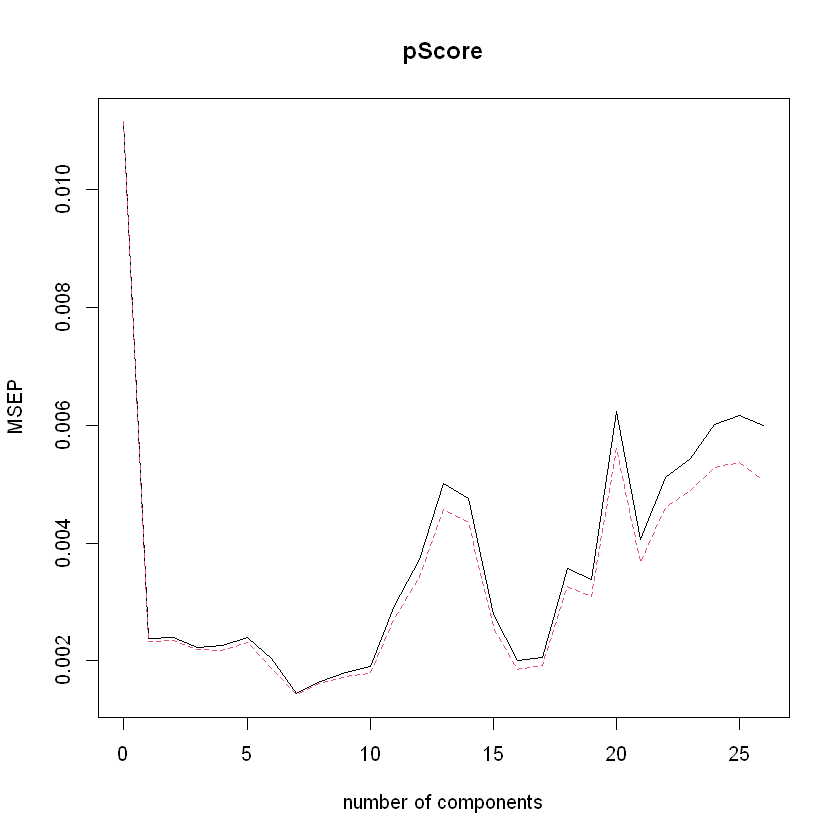

In [64]:
validationplot(pcr_fit, val.type = "MSEP")

In [65]:
ncomp.choice.pcr <- c(2:7)[5-1]

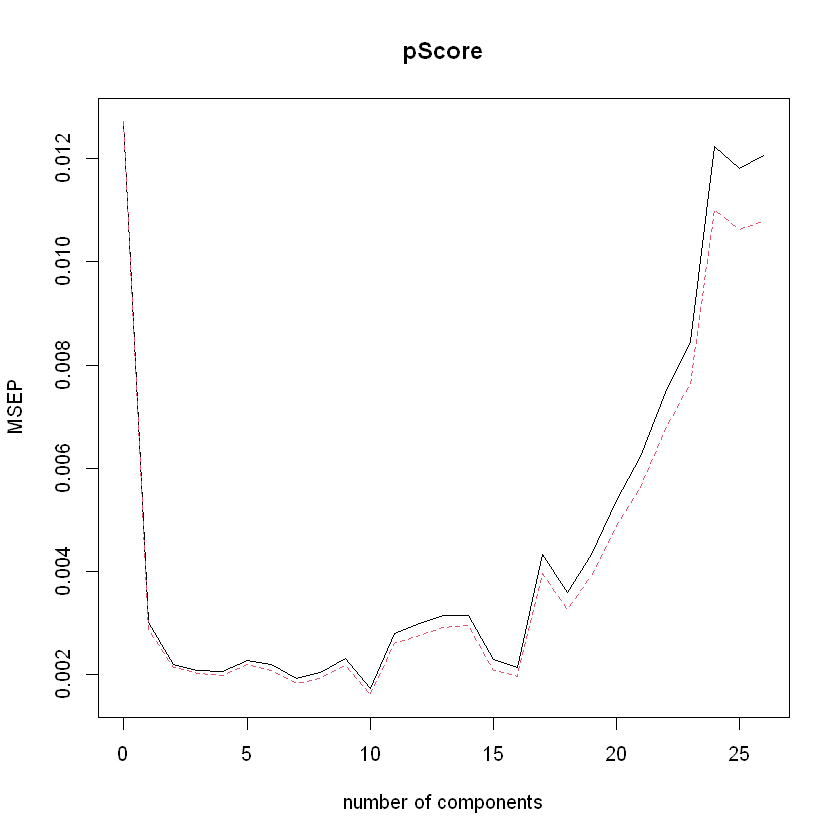

In [66]:
pcr_fit2 = pcr(fmla, data = train, scale = TRUE, validation = "CV")
# pcr_fit2 = pcr(Salary~., data = train, scale = TRUE, validation = "CV")
validationplot(pcr_fit2, val.type = "MSEP")

In [67]:
pcr_pred = predict(pcr_fit2, x_test, ncomp=ncomp.choice.pcr) # ncomp=7)
mean((pcr_pred - y_test)^2)

[1] 0.002472495

In [68]:
x = model.matrix(fmla, Hitters.yad)[,-1]
# x = model.matrix(Salary~., Hitters.yad)[,-1]

y = Hitters.yad %>%
  select(pScore) %>%
  # select(Salary) %>%
  unlist() %>%
  as.numeric()

Data: 	X dimension: 43 26 
	Y dimension: 43 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps
X         44.21     64.0    74.89    82.69    88.21
pScore    83.41     85.2    85.57    88.01    88.02


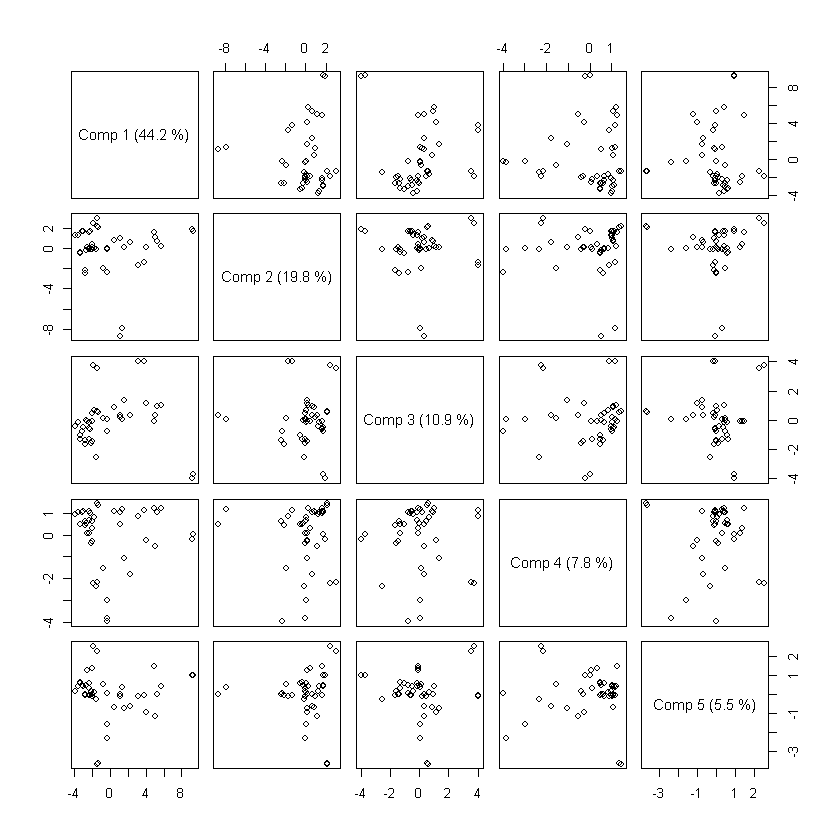

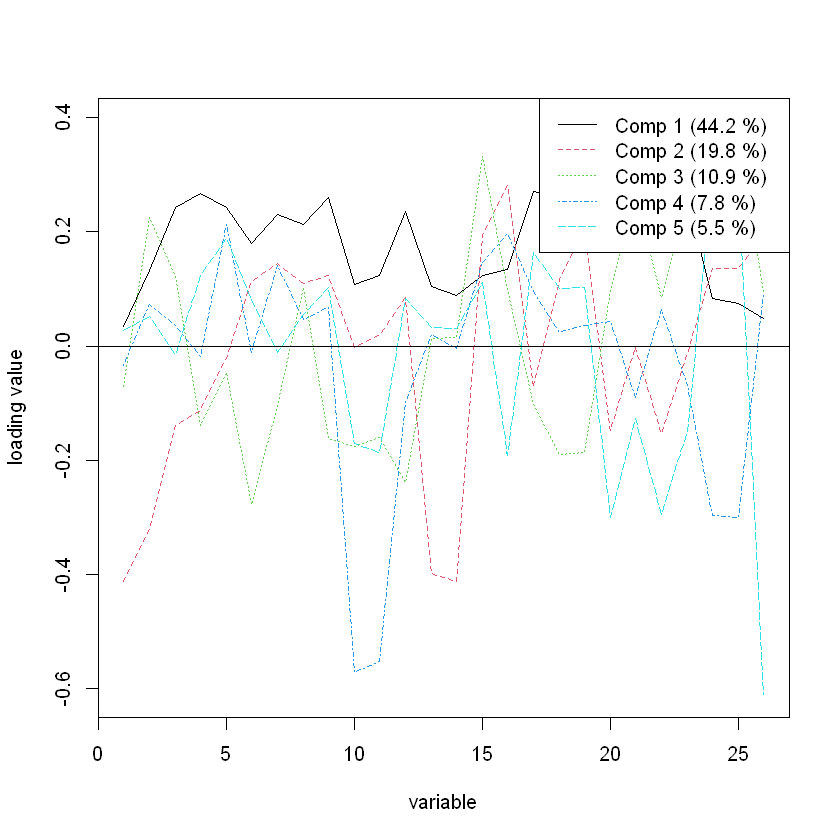

In [69]:
# pcr_fit2 = pcr(y~x, scale = TRUE, ncomp=ncomp.choice.pcr) # ncomp = 7)
pcr_fit2 = pcr(fmla, data=Hitters.yad, scale = TRUE, ncomp=ncomp.choice.pcr) # ncomp = 7)
summary(pcr_fit2)

plot(pcr_fit2, plottype = "scores", comps = 1:ncomp.choice.pcr)
  # [for patterns, groups or outliers]
plot(pcr_fit2, "loadings", comps = 1:ncomp.choice.pcr
  , legendpos = "topright" # presumes 2 <= ncomp.choice.pcr
  # , labels = "numbers"
  # [much used for interpretation purposes]
); abline(h=0)

In [70]:
head(round(pcr_fit2$coefficients, 4), 2)
pcr_fit2$projection
pcr_fit2$loadings

, , 1 comps

                 pScore
UGactualStudents 0.0010
PGactualStudents 0.0037

, , 2 comps

                  pScore
UGactualStudents -0.0016
PGactualStudents  0.0018

, , 3 comps

                  pScore
UGactualStudents -0.0019
PGactualStudents  0.0026

, , 4 comps

                  pScore
UGactualStudents -0.0022
PGactualStudents  0.0034

, , 5 comps

                  pScore
UGactualStudents -0.0022
PGactualStudents  0.0035

,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
UGactualStudents,0.03396132,-0.412962147,-0.07019894,-0.033498285,0.02661412
PGactualStudents,0.13243176,-0.319429768,0.22463648,0.072535559,0.05162747
PhDpursuing,0.24345153,-0.138830687,0.12177183,0.036612701,-0.01532564
FROsalaries,0.26690484,-0.113522594,-0.13884818,-0.018867133,0.12389114
FROmtce,0.24312789,-0.022329672,-0.04568908,0.213547627,0.18810272
FROseminars,0.18045213,0.113908396,-0.27794891,-0.011856311,0.08109192
SRprojects,0.23103863,0.145121870,-0.10415494,0.141025114,-0.01123556
SRagencies,0.21208349,0.108844059,0.10220430,0.046081537,0.05557125
SRamount,0.25997069,0.124237677,-0.16253862,0.068092032,0.10218339
Cprojects,0.10780346,-0.002318797,-0.17541650,-0.571537777,-0.17047390



Loadings:
                    Comp 1 Comp 2 Comp 3 Comp 4 Comp 5
UGactualStudents           -0.413                     
PGactualStudents     0.132 -0.319  0.225              
PhDpursuing          0.243 -0.139  0.122              
FROsalaries          0.267 -0.114 -0.139         0.124
FROmtce              0.243                0.214  0.188
FROseminars          0.180  0.114 -0.278              
SRprojects           0.231  0.145 -0.104  0.141       
SRagencies           0.212  0.109  0.102              
SRamount             0.260  0.124 -0.163         0.102
Cprojects            0.108        -0.175 -0.572 -0.170
Corgs                0.123        -0.160 -0.553 -0.186
Camount              0.236        -0.238              
faculty              0.104 -0.398                     
UGPGPhD                    -0.413                     
propPGPhD            0.124  0.193  0.332  0.147  0.111
propPhD              0.134  0.281         0.198 -0.192
FROcost              0.271        -0.103         0.163

In [71]:
pcr_fit2.ldgs <- pcr_fit2$loadings
pcr_fit2.comVar.shrunk <- shrinkCompsVariables(pcr_fit2.ldgs); pcr_fit2.comVar.shrunk
pcr_fit2.ldgs.shrunk <- pcr_fit2.ldgs[dimnames(pcr_fit2.ldgs)[[1]] %in% pcr_fit2.comVar.shrunk,]
round(pcr_fit2.ldgs.shrunk, 3)

Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
FROsalaries,UGactualStudents,propPGPhD,Cprojects,works_count2021
FROcost,faculty,TCperWork2021,Corgs,works_count2022
SRCrevenue,UGPGPhD,TCperWork2022,TCperWork2022,works2022perFaculty


,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
UGactualStudents,0.034,-0.413,-0.070,-0.033,0.027
FROsalaries,0.267,-0.114,-0.139,-0.019,0.124
Cprojects,0.108,-0.002,-0.175,-0.572,-0.170
Corgs,0.123,0.019,-0.160,-0.553,-0.186
faculty,0.104,-0.398,0.013,0.020,0.033
UGPGPhD,0.088,-0.413,0.016,-0.004,0.031
propPGPhD,0.124,0.193,0.332,0.147,0.111
FROcost,0.271,-0.072,-0.103,0.096,0.163
SRCrevenue,0.262,0.117,-0.189,0.023,0.101
works_count2021,0.246,-0.147,0.097,0.043,-0.300
